
# Project :: Exploratory Data Analysis (EDA)

---

Problem Statement :
Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. 

---

### Import packages

In [24]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib

# importing packages for plotly visualization
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()


from sklearn.preprocessing import MinMaxScaler
import json
import os
import folium

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

## 1. Load the `sat_scores.csv` dataset and describe it


### 1.1 Load the file with the `csv` module and put it in a Python dictionary and also 

The dictionary format for data will be the column names as key, and the data under each column as the values.

Example:
```
python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [22]:
# Assign a variable and specify the file path.
scores_file = "./sat_scores.csv"

# Create a dictionary
scores = {}

# Read the file
with open(scores_file, 'r') as file :
    lines = file.readlines()
    #print(lines)
# for loop to remove the \n by reading every line.
for i in range(len(lines)):
    #print(i) # prints the index 0 to 52
    lines[i] = lines[i].replace('\n','')
header = lines[0].split(',')
#print(header)
data = lines[1:]
#print(data)

# for loop to divide each state data
for j in range(len(data)):
    data[j]=data[j].split(',')
    #print(data)

# for loop to put th header in different columns.
for k in range(len(header)):
    col = []
    for l in range(len(data)):
        #print(l) # prints the index 0 to 52
        col.append(data[l][k])
        scores[header[k]] = col
        
print(scores)

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566',

In [35]:
# Transform the dictionary into dataframe

sat_scores_dict = pd.DataFrame.from_dict(scores)

print(sat_scores_dict.dtypes)

sat_scores_dict.head()

State     object
Rate      object
Verbal    object
Math      object
dtype: object


State Rate Verbal Math
0    CT   82    509  510
1    NJ   81    499  513
2    MA   79    511  515
3    NY   77    495  505
4    NH   72    520  516

In [31]:
# Option 2:
# Q 1.1-- Define a dictionary with the column values as list.

sat_scores_dict = {'State':[],'Rate':[], 'Verbal':[],'Math':[]}
#sat_scores_dict

# Open the csv file and read the file in read mode using csv.reader() method.
with open('sat_scores.csv','r') as file:
    lines = csv.DictReader(file)
# Use a for loop to append the values in each row for the columsn defined earlier in the sat_scores_dict.    
# Also, all column values needs to be float otherwise they will be converted as object.
    for row in lines:
        sat_scores_dict['State'].append(row['State'])
        sat_scores_dict['Rate'].append(float(row['Rate']))
        sat_scores_dict['Verbal'].append(float(row['Verbal']))
        sat_scores_dict['Math'].append(float(row['Math']))

        
# Print dict and verify.
sat_scores_dict
#sat_scores_dict

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': [82.0,
  81.0,
  79.0,
  77.0,
  72.0,
  71.0,
  71.0,
  69.0,
  69.0,
  68.0,
  67.0,
  65.0,
  65.0,
  63.0,
  60.0,
  57.0,
  56.0,
  55.0,
  54.0,
  53.0,
  53.0,
  52.0,
  51.0,
  51.0,
  34.0,
  33.0,
  31.0,
  26.0,
  23.0,
  18.0,
  17.0,
  13.0,
  13.0,
  12.0,
  12.0,
  11.0,
  11.0,
  9.0,
  9.0,
  9.0,
  8.0,
  8.0,
  8.0,
  7.0,
  6.0,
  6.0,
  5.0,
  5.0,
  4.0,
  4.0,
  4.0,
  45.0],
 'Verbal': [509.0,
  499.0,
  511.0,
  495.0,
  520.0,
  501.0,
  500.0,
  511.0,
  506.0,
  510.0,
  501.0,
  508.0,
  493.0,
  491.0,
  499.0,
  486.0,
  482.0,

In [36]:
# Using .describe() mthod to print all the details.

sat_scores_dict.describe()

State Rate Verbal Math
count     52   52     52   52
unique    52   36     39   38
top       TN    9    577  499
freq       1    3      3    6

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

In [37]:
#Q 1.1-- Specify a variable and read the sat_scores csv file using pd.read().
sat_scores_csv = pd.read_csv('../project-two-master/sat_scores.csv')

# print type of csv file
print(type(sat_scores_csv))

# Print the sat_scores csv.
sat_scores_csv.head(3)

<class 'pandas.core.frame.DataFrame'>


State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [38]:
# Q1.3 -- Printing the first 10 columns with .head(num) function.

sat_scores_dict.head(10)

State Rate Verbal Math
0    CT   82    509  510
1    NJ   81    499  513
2    MA   79    511  515
3    NY   77    495  505
4    NH   72    520  516
5    RI   71    501  499
6    PA   71    500  499
7    VT   69    511  506
8    ME   69    506  500
9    VA   68    510  501

In [40]:
# Use describe method on the data frame.
sat_scores_dict.describe()

State Rate Verbal Math
count     52   52     52   52
unique    52   36     39   38
top       TN    9    577  499
freq       1    3      3    6

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [42]:
# Q2 -- Create a data dictionary of the sat scores that holds data about it but not the values.

# Define a dictionary.
sat_dict_data = {}

# Define the columns.
sat_dict_data['Variable'] = sat_scores_dict.columns
sat_dict_data['Type'] = sat_scores_dict.dtypes
sat_dict_data['Description'] = ['All State score', 'Rate of score','Verbal score', 'Math score']
sat_dict_data['Shape'] = sat_scores_dict.shape 

# Print and Verify
sat_dict_data

{'Variable': Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object'),
 'Type': State     object
 Rate      object
 Verbal    object
 Math      object
 dtype: object,
 'Description': ['All State score',
  'Rate of score',
  'Verbal score',
  'Math score'],
 'Shape': (52, 4)}

## 3. Visualizations of the Verbal and Math scores.

### 3.1 Plotting a simple line plot

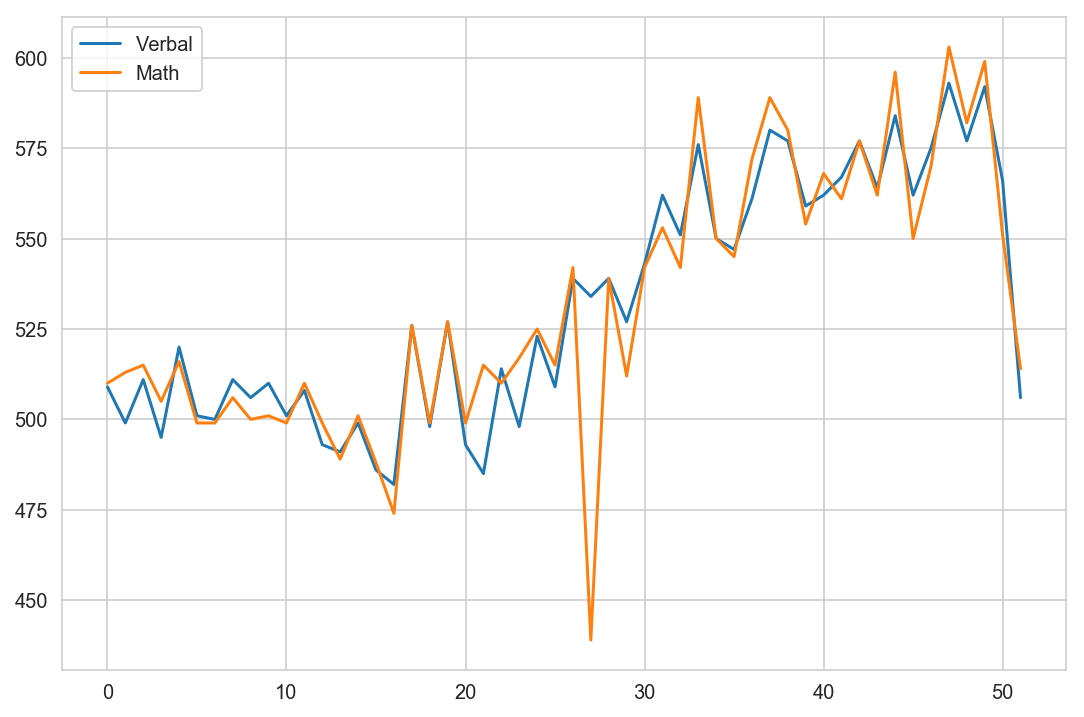

In [6]:
# Line Plot of Verbal and Math scores
cols = {'Verbal': [],'Math' : []}

# A new dataframe created for plotting Verbal and Maths scores only.
plot_df = pd.DataFrame(data= cols)
plot_df['Verbal'] = sat_scores_csv['Verbal']
plot_df['Math'] = sat_scores_csv['Math']

plot_df.plot.line(figsize=(9,6))

# My Observations : The trend of the plot for Verbal and Math scores looks similar 
                 # except a dip in the Math score which represents the outlier data.

### 3.2 Plotly plot for Verbal scores

In [30]:
# Parse the values from the dataframe.
us_states = np.asarray(sat_scores_dict['State'])
verbal_scores = np.asarray(sat_scores_dict['Verbal'])
 
# plotly code for choropleth map
score_scale = [[0, 'rgb(229, 239, 245)'],[1, 'rgb(1, 97, 156)']]

data = [ dict(
        type = 'choropleth',
        colorscale = score_scale,
        autocolorscale = False,
        showscale = False,
        locations = us_states,
        z = verbal_scores,
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255, 255, 255)',
                width = 2
            ) ),
        ) ]

layout = dict(
        title = 'State Verbal Scores in United States - 2018',
        geo = dict(
            scope = 'usa',
            showlakes = True,
            lakecolor = 'rgb(255, 254, 255)',
            countrycolor = 'rgb(255, 255, 255)')
             )
 
figure = dict(data=data, layout=layout)
 
iplot(figure)

### 3.3 Plotly plot for Math scores

In [35]:
# Parse the values from the dataframe.
us_states = np.asarray(sat_scores_dict_df['State'])

math_scores = np.asarray(sat_scores_dict_df['Math'])
 
# plotly code for choropleth map
score_scale = [[0, 'rgb(229, 239, 245)'],[1, 'rgb(1, 97, 156)']]

data = [ dict(
        type = 'choropleth',
        colorscale = score_scale,
        autocolorscale = False,
        showscale = False,
        locations = us_states,
        z = math_scores,
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255, 255, 255)',
                width = 2
            ) ),
        ) ]

layout = dict(
        title = 'State Math Scores in United States - 2018',
        geo = dict(
            scope = 'usa',
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
            countrycolor = 'rgb(255, 255, 255)')
             )
 
figure = dict(data=data, layout=layout)
 
iplot(figure)

### 3.4 Seaborn's distplot 
- Plot the distributions for each of Rate , Math , and Verbal
- Set the keyword argument kde=False . This way you can actually see the counts within bins. You can adjust the number of bins to your liking.

In [50]:
sat_scores_csv.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [49]:
sat_scores_csv.head()

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516

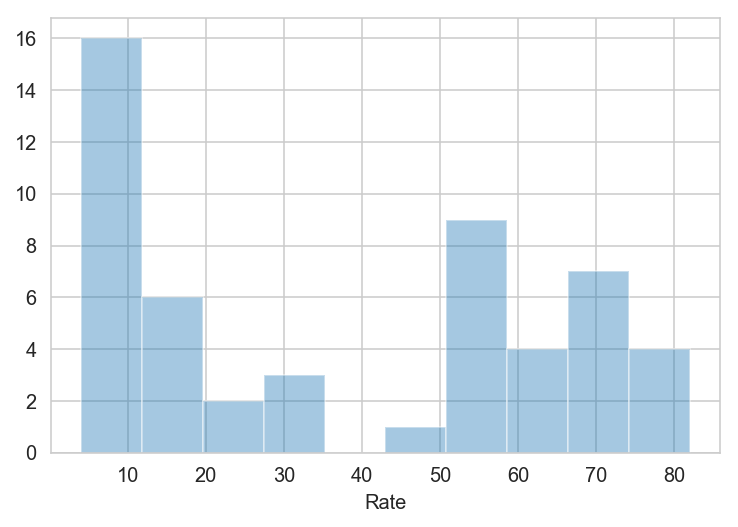

In [48]:
# Q3.1.1 -- Plotting seaborn distribution plot for Rate.
sns.distplot(sat_scores_csv['Rate'],bins =10, kde=False)

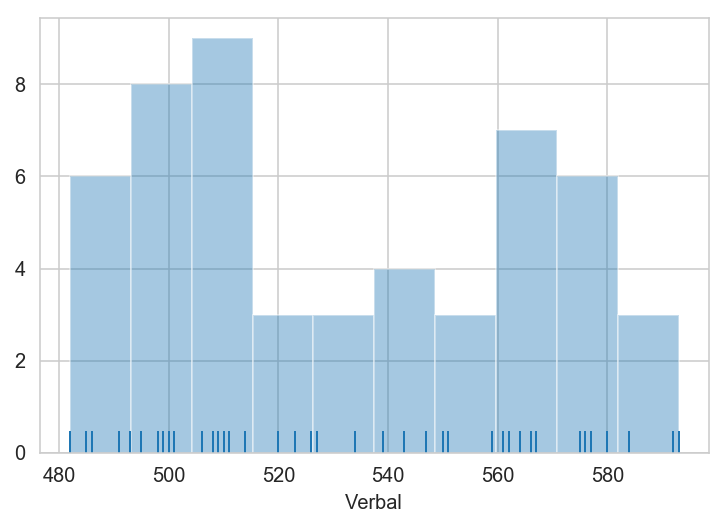

In [51]:
# Q3.1.2 -- Plotting seaborn distribution plot for Verbal.
sns.distplot(sat_scores_csv['Verbal'], bins =10,kde=False, rug=True)

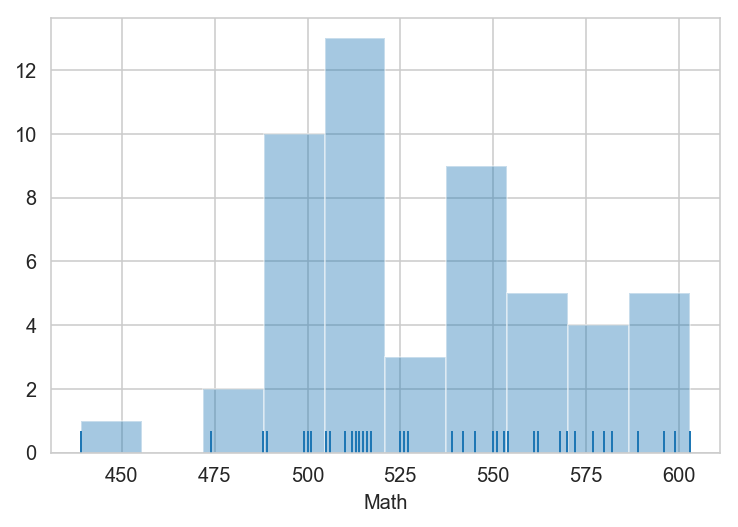

In [52]:
# Q3.1.3 -- Plotting seaborn distribution plot for Math.
sns.distplot(sat_scores_csv['Math'], bins =10,kde=False, rug=True)

### 3.5 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

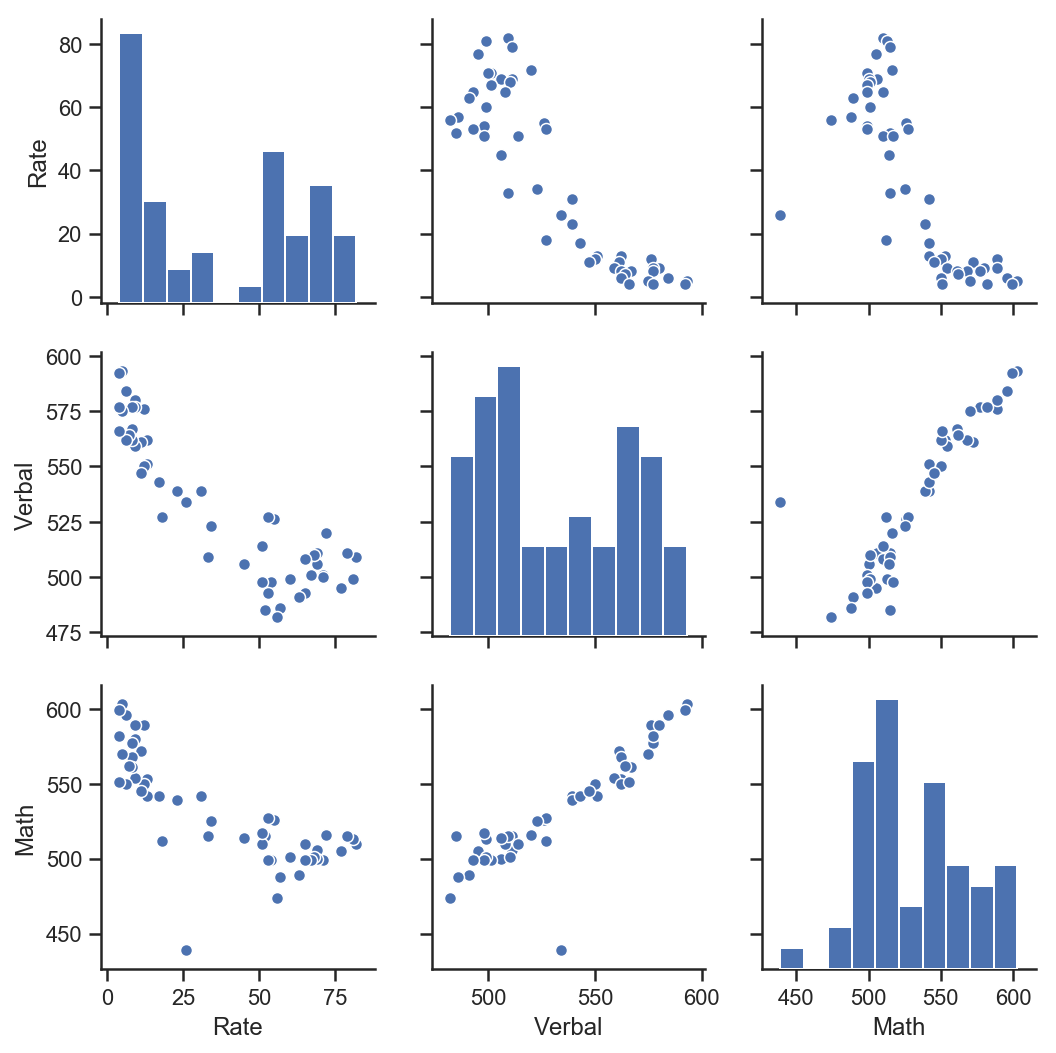

In [53]:
# # Q3.2 -- Plotting seaborn distribution plot for all three variables in the given dataframe.

sns.set(style='ticks',color_codes=True)
sns.pairplot(sat_scores_csv)

-- Definations :
- Positive coorelation : If one variable increases, other varibale increases as well.
- Negative coorelation : If one variable increases, other varibale decreases as well.

-- General findings :
- The pair plot shows the correlation between the three variables.
- The Math score has higher median value than Verbal score.

-- Coorelation findings :
1. The correlation between Rate(X-axis) and Math(Y-axis) are negative coorelated with one outlier visible in the Math dataset.
2. The correlation between Verbal(X-axis) and Math(Y-axis) are positive coorelated with one outlier visible.
3. The correlation between Rate(X-axis) and Verbal(Y-axis) are negative coorelated.
4. The correlation between Verbal(x-axis) and Rate(y-axis) are negative coorelated.
5. The correlation between Math(x-axis) and Verbal(y-axis) are positive coorelated with two outliers visible.
6. The correlation between Math(x-axis) and Rate(y-axis) are negative coorelated with one outlier visible in the Math dataset.

### 3.6 Plot a stacked histogram with `Verbal` and `Math` using pandas

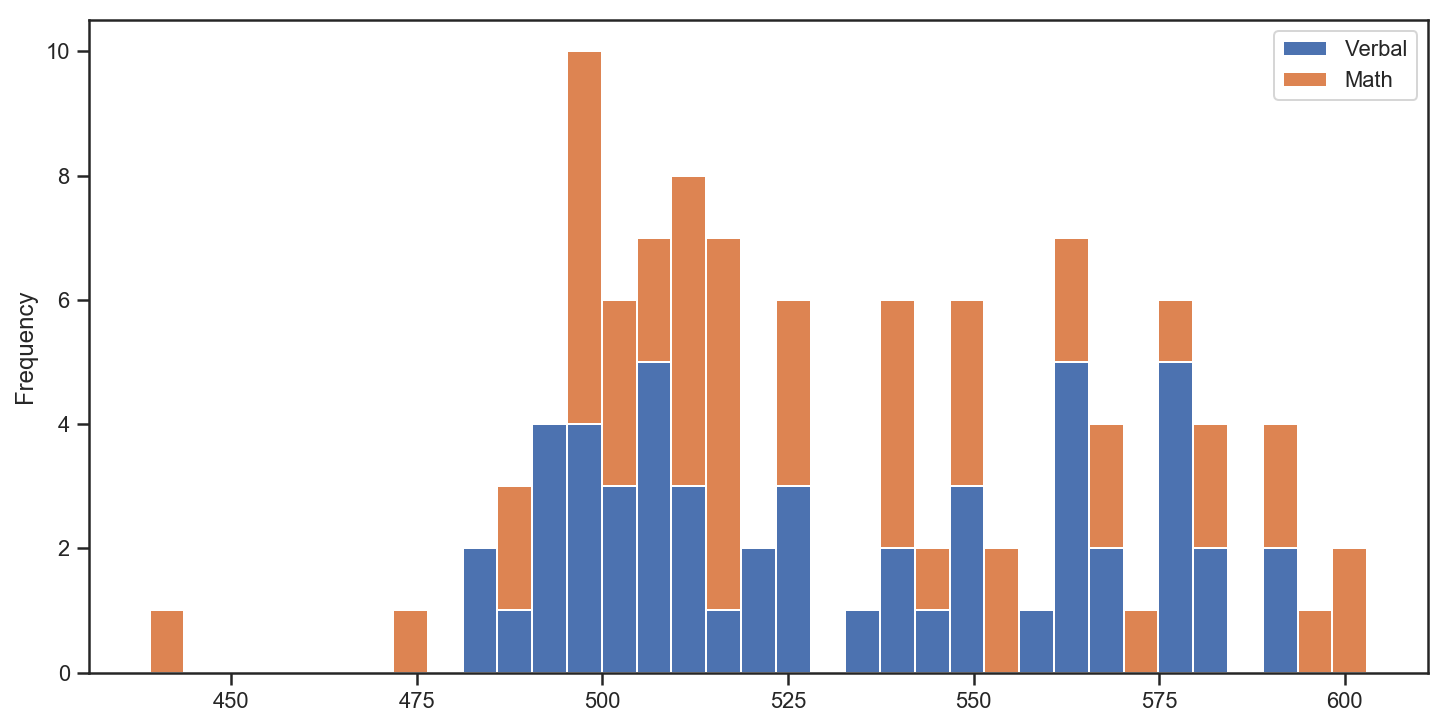

In [54]:
# Q4.1 -- Plotting the stacked histogram between Verbal and Math values using pandas dataframe.

verbal_maths_stackplt = pd.DataFrame(sat_scores_csv, columns=['Verbal', 'Math'])
verbal_maths_stackplt.plot.hist(stacked=True,figsize=(12,6),bins = 35)


### 3.7  Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

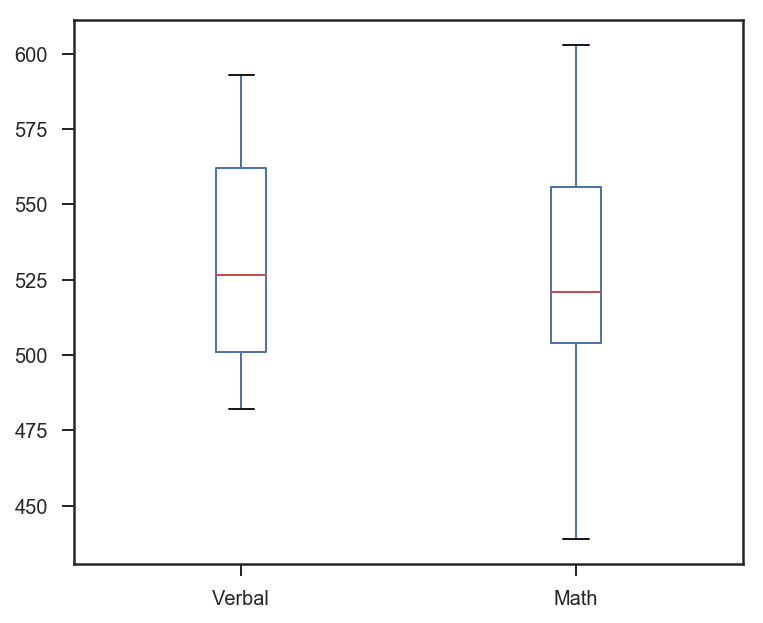

In [19]:
# Q4.2 -- Plotting the boxplots between Verbal and Math values using pandas dataframe.

verbal_maths_boxplt = pd.DataFrame(sat_scores_dict_df, columns=['Verbal', 'Math'])
verbal_maths_boxplt.plot.box(figsize=(6,5))

Findings :
1. Math data is more widely spread in compare to verbal data.
2. Math have lower 25% and higher 75% than verbal
3. Student's score looks more in lower median for Math and Verbal.


### 3.8 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


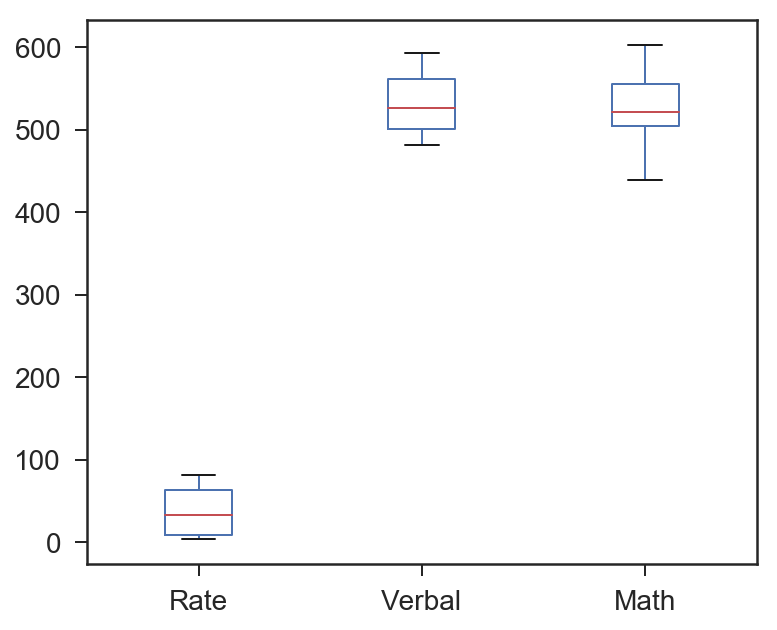

In [20]:
# Q4.3 -- Plotting the boxplots between Verbal and Math values using pandas dataframe.

verbal_maths_boxplt_all = pd.DataFrame(sat_scores_dict_df, columns=['Rate','Verbal', 'Math'])
verbal_maths_boxplt_all.plot.box(fontsize=14,figsize=(6,5))

### 3.9 Plotting the Rate mean, standard deviation

37.15384615384615 27.037996494523586


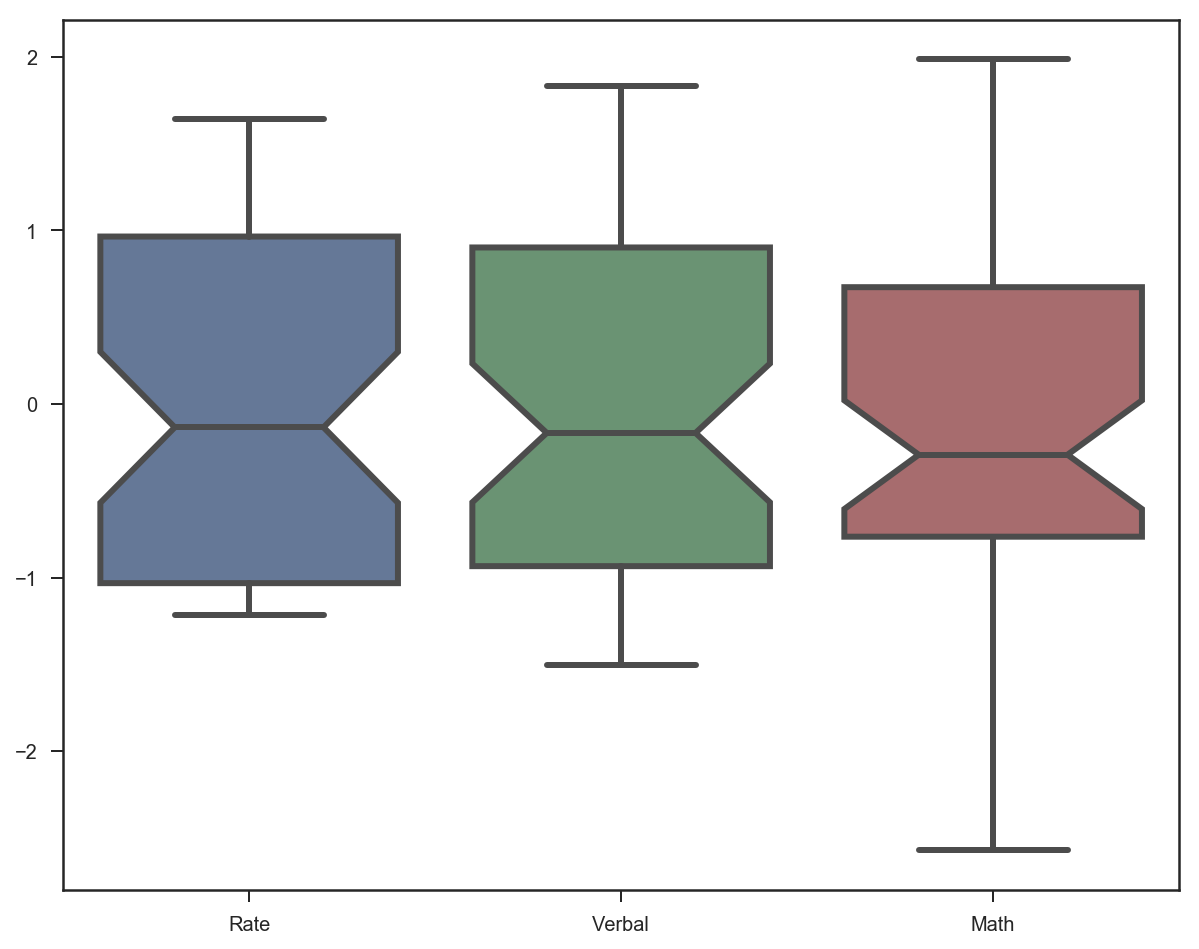

In [21]:
# Standardize percolumn
Rate = sat_scores_dict_df.Rate.values
Rate_mean = np.mean(Rate)
Rate_std = np.std(Rate)
print(Rate_mean, Rate_std)

#sat_scores_stand = (sat_scores - sat_scores.mean()) / sat_scores.std()
sat_scores_stand = sat_scores_dict_df[['Rate','Verbal','Math']]
sat_scores_st = (sat_scores_stand - sat_scores_stand.mean()) / sat_scores_stand.std()

#sat_scores_st.plot.box(figsize=(8,8),fontsize =14, subplots=False)
fig = plt.figure(figsize=(10, 8))
ax = fig.gca()
sns.boxplot(data=sat_scores_st,orient='v', fliersize=5,
linewidth=3, notch=True, saturation=0.5, ax=ax)

### 3.10 Plotting using Tableau

<img src="files/MathVerbal_SAT_scores.png">

<img src="files/Map_Math_score1.png">

<img src="files/Map_Verbal_score.png">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [57]:
# Print the dataframe.
sat_scores_csv.head(3)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515

In [23]:
# Extra and to be ignored

#State_Verbal =sat_scores_csv.iloc[:,[0,2]]
#State_Verbal 
# verbal_mean = np.mean(sat_scores_csv.iloc[:,[0,2]]) 
# -- cannot use it as its type is pandas.core.series.Series and unable to use with pandas dataframe.

In [62]:
# Q5.1 -- Calculating the Average of the entire Verbal dataset across all states

verbal_mean = sat_scores_csv['Verbal'].mean()
print( "The Average Verbal score is : ", verbal_mean)
type(verbal_mean)

The Average Verbal score is :  532.0192307692307


numpy.float64

In [63]:
# Option 1: Check if each value in the "Verbal" is greater than the mean value of all values.
row_mask_mean=  sat_scores_csv.Verbal > verbal_mean

# Print the States if the above condition is True.
sat_scores_csv[row_mask_mean][['State']]

State
26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS

In [64]:
# Option 2

# Define a new empty list for storing all the output States.
States_list = []
# count for the number of States
count = 0
# for loop to check the condition and save the States in a list.
for ind,val in enumerate(sat_scores_csv['Verbal']):
    #print(ind,val)
    if val > verbal_mean:
        States_list.append(sat_scores_csv.iloc[ind,0])
        count +=1

print("Number of States are :", count)
print(States_list)
#sat_scores_csv.iloc[0, 0]

Number of States are : 24
['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [65]:
# 5.2 -- Calculating the Median of the entire Verbal dataset across all states

verbal_median = sat_scores_csv['Verbal'].median()
print( "The Median Verbal score is : ", verbal_median)
type(verbal_median)

The Median Verbal score is :  526.5


numpy.float64

In [66]:
# Option 1: Check if each value in the "Verbal" is greater than the median value of all values.
row_mask_median=  sat_scores_csv.Verbal > verbal_median

# Print the States if the above condition is True.
sat_scores_csv[row_mask_median][['State']]

State
19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS

In [67]:
# Option 2

# Define a new empty list for storing all the output States.
States_list1 = []
# count for the number of States
count1 = 0
# for loop to check the condition and save the States in a list.
for index,value in enumerate(sat_scores_csv['Verbal']):
    #print(index,value)
    if value > verbal_median:
        States_list1.append(sat_scores_csv.iloc[index,0])
        count1 +=1

print("Number of States are :", count1)
print(States_list1)
#sat_scores_dict_df.iloc[0, 0]

Number of States are : 26
['WA', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [68]:
# Q5.3 Finding the difference of Verbal and Math scores.
sat_scores_csv['Difference']= sat_scores_csv['Verbal'] - sat_scores_csv['Math']

# Print and verify.
sat_scores_csv.head(10)

State  Rate  Verbal  Math  Difference
0    CT    82     509   510          -1
1    NJ    81     499   513         -14
2    MA    79     511   515          -4
3    NY    77     495   505         -10
4    NH    72     520   516           4
5    RI    71     501   499           2
6    PA    71     500   499           1
7    VT    69     511   506           5
8    ME    69     506   500           6
9    VA    68     510   501           9

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [69]:
# Q5.4.1 -- Define new Dataframe 1 : Verbal is greater than Math

verbal_math_df1 = pd.DataFrame()

# Sort values of the Difference column in a descending order to get scores where Verbal is greater than Math.
verbal_math_df1 = sat_scores_csv.sort_values('Difference', ascending=False)

# Print the 10 states with the greatest gap between Verbal and Math scores.
verbal_math_df1.iloc[:10, :]

State  Rate  Verbal  Math  Difference
27    OH    26     534   439          95
50    MS     4     566   551          15
29    WV    18     527   512          15
45    AR     6     562   550          12
32    NM    13     551   542           9
31    TN    13     562   553           9
9     VA    68     510   501           9
16    DC    56     482   474           8
8     ME    69     506   500           6
41    OK     8     567   561           6

In [70]:
# Q5.4.2 -- Define new Dataframe 2 : Math is greater than Verbal

math_verbal_df2 = pd.DataFrame()

# Sort values of the Difference column in a ascending order to get scores where Math is greater than Verbal.
math_verbal_df2 = sat_scores_csv.sort_values('Difference', ascending=True)

# Print the 10 states with the greatest gap between Verbal and Math scores.
math_verbal_df2.iloc[:10, :]

State  Rate  Verbal  Math  Difference
21    HI    52     485   515         -30
23    CA    51     498   517         -19
1     NJ    81     499   513         -14
33    IL    12     576   589         -13
44    WI     6     584   596         -12
36    MI    11     561   572         -11
3     NY    77     495   505         -10
47    IA     5     593   603         -10
37    MN     9     580   589          -9
51   All    45     506   514          -8

In [33]:
# Q5.4.3 -- Print the header of both variables, only showing the top 3 states in each.

verbal_math_df1.head(3)

State  Rate  Verbal   Math  Difference
27    OH  26.0   534.0  439.0        95.0
50    MS   4.0   566.0  551.0        15.0
29    WV  18.0   527.0  512.0        15.0

In [34]:
# Q5.4.3 -- Print the header of both variables, only showing the top 3 states in each.

math_verbal_df2.head(3)

State  Rate  Verbal   Math  Difference
21    HI  52.0   485.0  515.0       -30.0
23    CA  51.0   498.0  517.0       -19.0
1     NJ  81.0   499.0  513.0       -14.0

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [71]:
# Q6.1 Create a correlation matrix and plot
# A correlation matrix is a table showing correlation coefficients between sets of variables i.e. between Rate, Verbal, Math. 
# This allows you to see which pairs with the highest correlation.

sat_scores_no_state = sat_scores_csv.copy()

# Drop the State column
sat_scores_no_state.pop('State')
sat_scores_no_state.pop('Difference')

# Print and verify.
sat_scores_no_state.head(5)

Rate  Verbal  Math
0    82     509   510
1    81     499   513
2    79     511   515
3    77     495   505
4    72     520   516

In [72]:
# Print the correlation matrix and verify without State column data.
corr_matrix = sat_scores_no_state.corr()
corr_matrix

Rate    Verbal      Math
Rate    1.000000 -0.886432 -0.773746
Verbal -0.886432  1.000000  0.899871
Math   -0.773746  0.899871  1.000000

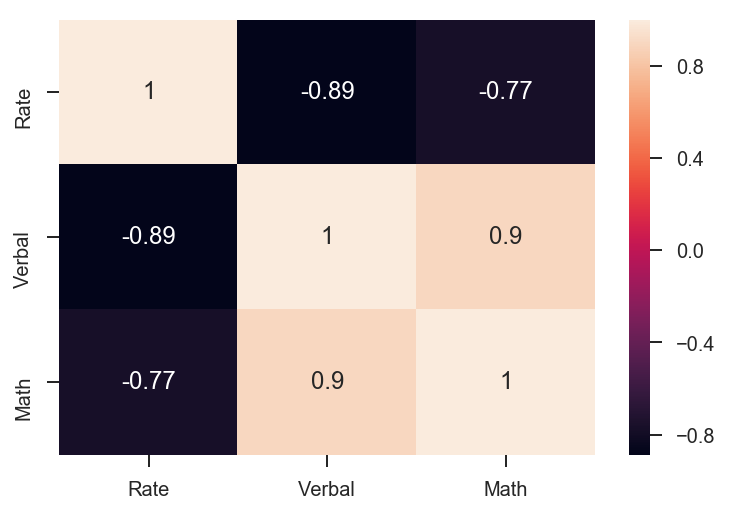

In [37]:
# pPot the correlation heatmap between all three variables - Rate, Verbal and Math
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,annot=True)

# My Observation : The darker squares shows high coorelation between the respective variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [73]:
# Q6.2 -- Using .describe() built-in function on our main dataframe.
sat_scores_csv.describe()

Rate      Verbal        Math  Difference
count  52.000000   52.000000   52.000000   52.000000
mean   37.153846  532.019231  531.500000    0.519231
std    27.301788   33.236225   36.014975   15.729939
min     4.000000  482.000000  439.000000  -30.000000
25%     9.000000  501.000000  504.000000   -6.000000
50%    33.500000  526.500000  521.000000    0.000000
75%    63.500000  562.000000  555.750000    4.250000
max    82.000000  593.000000  603.000000   95.000000

---
My Observations :
---
1. 'count' row will return the sum of all 52 entries in all 3 columns respectively.
2. 'mean' row will return the mean of all 52 entries in all 3 columns respectively.
3. 'std' row will return the standard deviation of all 52 entries in all 3 columns respectively.
4. 'min' row will return the minimum value of all 52 entries in all 3 columns respectively.
5. '25%' row will return the standard deviation of all 52 entries in all 3 columns respectively.
6. '50%' row will return the standard deviation of all 52 entries in all 3 columns respectively.
7. '75%' row will return the standard deviation of all 52 entries in all 3 columns respectively.
8. 'max' row will return the maximum value of all 52 entries in all 3 columns respectively.

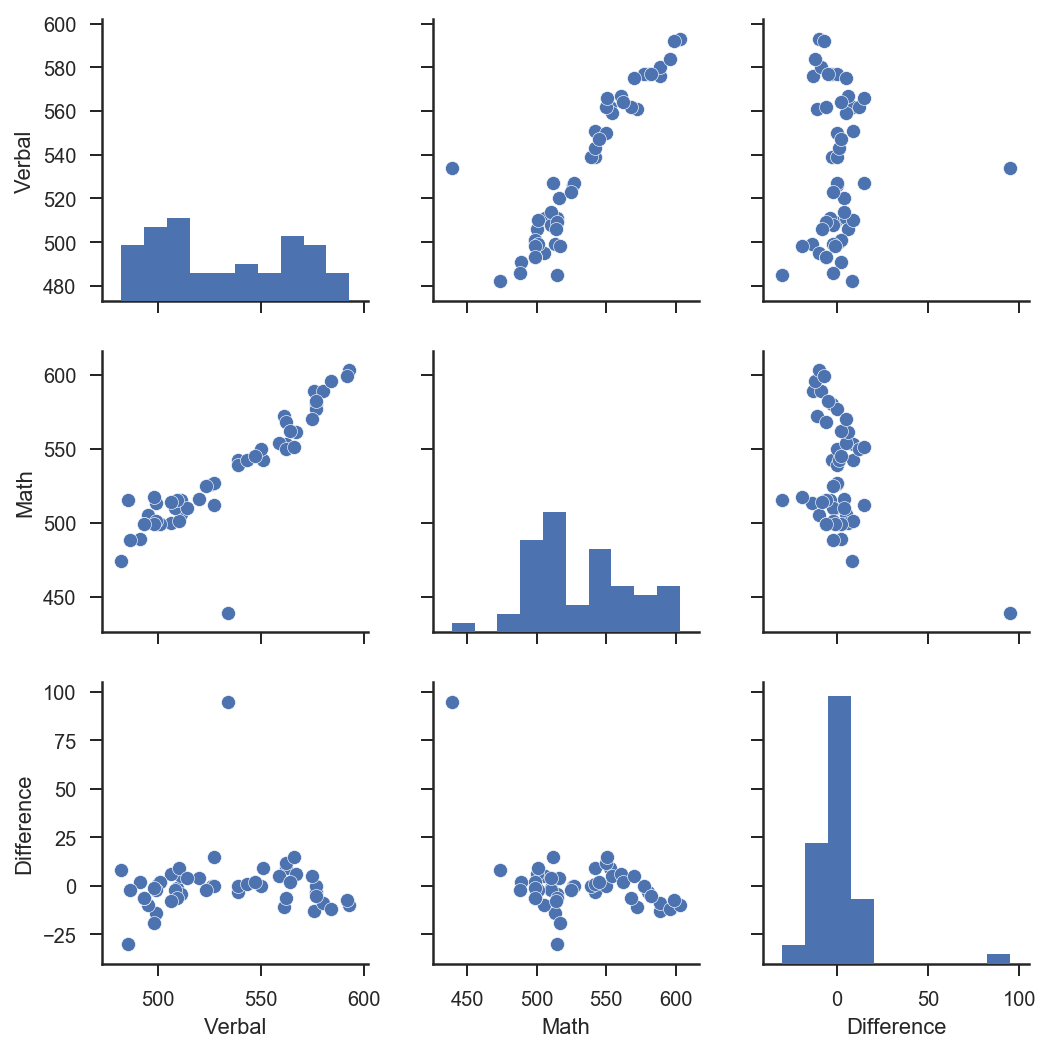

In [39]:
# Pair-plot on all three variables.
sns.pairplot(sat_scores_dict_df[['Verbal', 'Math', 'Difference']])

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [40]:
# Print the Covarince matrix
covr_matrix = sat_scores_no_state.cov()
covr_matrix

Rate       Verbal         Math
Rate    745.387632  -804.355958  -760.803922
Verbal -804.355958  1104.646682  1077.147059
Math   -760.803922  1077.147059  1297.078431

Q6.3.1 -- Difference 

1. Difference is that the correlation uses covariance by scaling it using standard deviation
2. Also, The covariance is a measure of "relatedness" between variables. It is literally the sum of deviations from the mean of XX times deviations from the mean of YY adjusted by the sample size NN.

In [41]:
# Printing the correlation matrix again for comparing. 
corr_matrix

Rate    Verbal      Math
Rate    1.000000 -0.886432 -0.773746
Verbal -0.886432  1.000000  0.899871
Math   -0.773746  0.899871  1.000000

In [74]:
# Q6.3.2 -- Process to convert the covariance into the correlation using their respective formulas.

# Step 1 : Converting the Verbal and Math columns from the dataframe to numpy array.
v_array = sat_scores_csv['Verbal'].values
m_array = sat_scores_csv['Math'].values
#type(v_array)

# Step 2 : Calculating covariance with the covariance formula.
covariance = np.sum((v_array - np.mean(v_array))*(m_array - np.mean(m_array)))/len(v_array)

# Print and verify.
print('1. The covarinace of Verbal and Math is =', covariance)

# Using Pearson correlation formula to convert covariance into correlation

# --------Pearson correlation : r = covariance (Verbal, Math)/sd(verbal)*sd(Math)----

# Calculating Pearson correlation using formula.
pearson_correlation = covariance / (np.std(v_array) * np.std(m_array))

# Print and verify.
print('2. The correlation of Verbal and Math is = ', pearson_correlation)

1. The covarinace of Verbal and Math is = 1056.4326923076924
2. The correlation of Verbal and Math is =  0.899870852544429


---
Q 6.3.3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?
---
Ans : Covariance is not very interpretable. The values are difficult to read because they are relative to the variance of the variables.So, the correlation uses Covariance and then scaled it using stadard deviations

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [180]:
# Q7.1 -- Specify a variable and read the sat_scores csv file.

drug_use_age_df = pd.read_csv('../project-two-master/drug-use-by-age.csv')

# Print the sat_scores csv.
#drug_use_age_csv.head(5)
drug_use_age_df

# My observation : As part of data cleaning, the columns need renaming and the empty values can be converted NAN or 0 values. 
# Also,the column 'n' is assumed to be number of people participated in the survey. 
# In terms given dataset quality and values, the approach of EDA will not be affected at this stage.


age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798          3.9                3.0            1.1   
1      13  2757          8.5                6.0            3.4   
2      14  2792         18.1                5.0            8.7   
3      15  2956         29.2                6.0           14.5   
4      16  3058         40.1               10.0           22.5   
5      17  3038         49.3               13.0           28.0   
6      18  2469         58.7               24.0           33.7   
7      19  2223         64.6               36.0           33.4   
8      20  2271         69.7               48.0           34.0   
9      21  2354         83.2               52.0           33.0   
10  22-23  4707         84.2               52.0           28.4   
11  24-25  4591         83.1               52.0           24.9   
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5               52.0           16.4   
14  35-49  7391         75.0               52.0           10.4   
15  50-64  3923         67.2               52.0            7.3   
16    65+  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                   4.0          0.1               5.0        0.0   
1                  15.0          0.1               1.0        0.0   
2                  24.0          0.1               5.5        0.0   
3                  25.0          0.5               4.0        0.1   
4                  30.0          1.0               7.0        0.0   
5                  36.0          2.0               5.0        0.1   
6                  52.0          3.2               5.0        0.4   
7                  60.0          4.1               5.5        0.5   
8                  60.0          4.9               8.0        0.6   
9                  52.0          4.8               5.0        0.5   
10                 52.0          4.5               5.0        0.5   
11                 60.0          4.0               6.0        0.5   
12                 52.0          3.2               5.0        0.4   
13                 72.0          2.1               8.0        0.5   
14                 48.0          1.5              15.0        0.5   
15                 52.0          0.9              36.0        0.4   
16                 36.0          0.0                 -        0.0   

   crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0                -        ...                    0.1                24.5   
1              3.0        ...                    0.1                41.0   
2                -        ...                    0.4                 4.5   
3              9.5        ...                    0.8                 3.0   
4              1.0        ...                    1.1                 4.0   
5             21.0        ...                    1.4                 6.0   
6             10.0        ...                    1.7                 7.0   
7              2.0        ...                    1.5                 7.5   
8              5.0        ...                    1.7                12.0   
9             17.0        ...                    1.3                13.5   
10             5.0        ...                    1.7                17.5   
11             6.0        ...                    1.3                20.0   
12             6.0        ...                    1.2                13.5   
13            15.0        ...                    0.9                46.0   
14            48.0        ...                    0.3                12.0   
15            62.0        ...                    0.4                 5.0   
16               -        ...                    0.0                   -   

    tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0                0.2                    52.0            0.2   
1                0.3                    25.5            0.3   
2               

In [181]:
# Printing the column names from the data frame.
drug_use_age_df.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [182]:
# Data cleaning 1 : Renaming the column names and doing data cleaning.

drug_use_age_df.rename(columns={'age': 'Age', 'n' : 'Number_tested',
                                 'alcohol-use' : 'Alcohol_Use','alcohol-frequency' : 'Alcohol_Freq' ,
                                'marijuana-use': 'Marijuana_Use','marijuana-frequency' : 'Marijuana_Freq',
                                'cocaine-use' : 'Cocaine_Use', 'cocaine-frequency': 'Cocaine_Freq',
                                 'crack-use' : 'Crack_Use','crack-frequency' : 'Crack_Freq', 
                                'heroin-use' : 'Heroin_Use', 'heroin-frequency' : 'Heroin_Freq', 
                                'hallucinogen-use' : 'Hallucinogen_Use','hallucinogen-frequency' : 'Hallucinogen_Freq', 
                                'inhalant-use' : 'Inhalant_Use', 'inhalant-frequency' : 'Inhalant_Freq',
                                'pain-releiver-use' : 'Pain_Releiver_Use', 'pain-releiver-frequency' : 'Pain_Releiver_Freq', 
                                 'oxycontin-use' : 'Oxycontin_Use','oxycontin-frequency' : 'Oxycontin_Freq', 
                                 'tranquilizer-use' : 'Tranquilizer_Use', 'tranquilizer-frequency' : 'Tranquilizer_Freq',
                                 'stimulant-use' : 'Stimulant_Use', 'stimulant-frequency' : 'Stimulant_Freq', 
                                 'meth-use' : 'Meth_Use', 'meth-frequency' : 'Meth_Freq',
                                 'sedative-use' : 'Sedative_Use', 'sedative-frequency' : 'Sedative_Freq'
                                }, inplace=True)

drug_use_age_df.columns

Index(['Age', 'Number_tested', 'Alcohol_Use', 'Alcohol_Freq', 'Marijuana_Use',
       'Marijuana_Freq', 'Cocaine_Use', 'Cocaine_Freq', 'Crack_Use',
       'Crack_Freq', 'Heroin_Use', 'Heroin_Freq', 'Hallucinogen_Use',
       'Hallucinogen_Freq', 'Inhalant_Use', 'Inhalant_Freq',
       'Pain_Releiver_Use', 'Pain_Releiver_Freq', 'Oxycontin_Use',
       'Oxycontin_Freq', 'Tranquilizer_Use', 'Tranquilizer_Freq',
       'Stimulant_Use', 'Stimulant_Freq', 'Meth_Use', 'Meth_Freq',
       'Sedative_Use', 'Sedative_Freq'],
      dtype='object')

In [183]:
# Data cleaning 2: By replacing the empty entries in ceratin columns to NAN.

# Two ways to replace, either directly feed the names of the columns or use for loop to check and replace.
cols = ['Cocaine_Freq','Crack_Freq','Oxycontin_Freq','Meth_Freq']
drug_use_age_df[cols] = drug_use_age_df[cols].replace('-', 'NAN')

In [184]:
# Print the data frame.
drug_use_age_csv = drug_use_age_df.copy(deep = True)
drug_use_age_csv.head()

Age  Number_tested  Alcohol_Use  Alcohol_Freq  Marijuana_Use  \
0  12           2798          3.9           3.0            1.1   
1  13           2757          8.5           6.0            3.4   
2  14           2792         18.1           5.0            8.7   
3  15           2956         29.2           6.0           14.5   
4  16           3058         40.1          10.0           22.5   

   Marijuana_Freq  Cocaine_Use Cocaine_Freq  Crack_Use Crack_Freq  \
0             4.0          0.1          5.0        0.0        NAN   
1            15.0          0.1          1.0        0.0        3.0   
2            24.0          0.1          5.5        0.0        NAN   
3            25.0          0.5          4.0        0.1        9.5   
4            30.0          1.0          7.0        0.0        1.0   

       ...       Oxycontin_Use Oxycontin_Freq  Tranquilizer_Use  \
0      ...                 0.1           24.5               0.2   
1      ...                 0.1           41.0               0.3   
2      ...                 0.4            4.5               0.9   
3      ...                 0.8            3.0               2.0   
4      ...                 1.1            4.0               2.4   

   Tranquilizer_Freq  Stimulant_Use Stimulant_Freq  Meth_Use  Meth_Freq  \
0               52.0            0.2            2.0       0.0        NAN   
1               25.5            0.3            4.0       0.1        5.0   
2                5.0            0.8           12.0       0.1       24.0   
3                4.5            1.5            6.0       0.3       10.5   
4               11.0            1.8            9.5       0.3       36.0   

   Sedative_Use Sedative_Freq  
0           0.2          13.0  
1           0.1          19.0  
2           0.2          16.5  
3           0.4          30.0  
4           0.2           3.0  

[5 rows x 28 columns]

In [185]:
drug_use_age_df.Age.unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'],
      dtype=object)

In [186]:
drug_use_age_df.tail(10)

Age  Number_tested  Alcohol_Use  Alcohol_Freq  Marijuana_Use  \
7      19           2223         64.6          36.0           33.4   
8      20           2271         69.7          48.0           34.0   
9      21           2354         83.2          52.0           33.0   
10  22-23           4707         84.2          52.0           28.4   
11  24-25           4591         83.1          52.0           24.9   
12  26-29           2628         80.7          52.0           20.8   
13  30-34           2864         77.5          52.0           16.4   
14  35-49           7391         75.0          52.0           10.4   
15  50-64           3923         67.2          52.0            7.3   
16    65+           2448         49.3          52.0            1.2   

    Marijuana_Freq  Cocaine_Use Cocaine_Freq  Crack_Use Crack_Freq  \
7             60.0          4.1          5.5        0.5        2.0   
8             60.0          4.9          8.0        0.6        5.0   
9             52.0          4.8          5.0        0.5       17.0   
10            52.0          4.5          5.0        0.5        5.0   
11            60.0          4.0          6.0        0.5        6.0   
12            52.0          3.2          5.0        0.4        6.0   
13            72.0          2.1          8.0        0.5       15.0   
14            48.0          1.5         15.0        0.5       48.0   
15            52.0          0.9         36.0        0.4       62.0   
16            36.0          0.0          NAN        0.0        NAN   

        ...       Oxycontin_Use Oxycontin_Freq  Tranquilizer_Use  \
7       ...                 1.5            7.5               4.2   
8       ...                 1.7           12.0               5.4   
9       ...                 1.3           13.5               3.9   
10      ...                 1.7           17.5               4.4   
11      ...                 1.3           20.0               4.3   
12      ...                 1.2           13.5               4.2   
13      ...                 0.9           46.0               3.6   
14      ...                 0.3           12.0               1.9   
15      ...                 0.4            5.0               1.4   
16      ...                 0.0            NAN               0.2   

    Tranquilizer_Freq  Stimulant_Use Stimulant_Freq  Meth_Use  Meth_Freq  \
7                 4.5            3.3            6.0       0.4      105.0   
8                10.0            4.0           12.0       0.9       12.0   
9                 7.0            4.1           10.0       0.6        2.0   
10               12.0            3.6           10.0       0.6       46.0   
11               10.0            2.6           10.0       0.7       21.0   
12               10.0            2.3            7.0       0.6       30.0   
13                8.0            1.4           12.0       0.4       54.0   
14                6.0            0.6           24.0       0.2      104.0   
15               10.0            0.3           24.0       0.2       30.0   
16                5.0            0.0          364.0       0.0        NAN   

    Sedative_Use Sedative_Freq  
7            0.3           6.0  
8            0.5           4.0  
9            0.3           9.0  
10           0.2          52.0  
11           0.2          17.5  
12           0.4           4.0  
13           0.4          10.0  
14           0.3          10.0  
15           0.2         104.0  
16           0.0          15.0  

[10 rows x 28 columns]

In [187]:
drug_use_age_df['Age'] = drug_use_age_df['Age'].replace('65+', '65')
drug_use_age_df['Age'] = drug_use_age_df['Age'].replace('22-23', float((22+23)/2))

In [189]:
# Data cleaning 3 : Averaging the Age column.

# Step 1: Remove plus sign from the last row for year 65+
col = ['Age']
drug_use_age_df[col] = drug_use_age_df[col].replace('65+', '65')
drug_use_age_df[col] = drug_use_age_df[col].replace('22-23', float((22+23)/2))
drug_use_age_df[col] = drug_use_age_df[col].replace('24-25', float((24+25)/2))
drug_use_age_df[col] = drug_use_age_df[col].replace('26-29', float((26+29)/2))
drug_use_age_df[col] = drug_use_age_df[col].replace('30-34', float((30+34)/2))
drug_use_age_df[col] = drug_use_age_df[col].replace('35-49', float((35+49)/2))
drug_use_age_df[col] = drug_use_age_df[col].replace('50-64', float((50+64)/2))

# Print and verify
drug_use_age_df.tail(10)

Age  Number_tested  Alcohol_Use  Alcohol_Freq  Marijuana_Use  \
7     19           2223         64.6          36.0           33.4   
8     20           2271         69.7          48.0           34.0   
9     21           2354         83.2          52.0           33.0   
10  22.5           4707         84.2          52.0           28.4   
11  24.5           4591         83.1          52.0           24.9   
12  27.5           2628         80.7          52.0           20.8   
13    32           2864         77.5          52.0           16.4   
14    42           7391         75.0          52.0           10.4   
15    57           3923         67.2          52.0            7.3   
16    65           2448         49.3          52.0            1.2   

    Marijuana_Freq  Cocaine_Use Cocaine_Freq  Crack_Use Crack_Freq  \
7             60.0          4.1          5.5        0.5        2.0   
8             60.0          4.9          8.0        0.6        5.0   
9             52.0          4.8          5.0        0.5       17.0   
10            52.0          4.5          5.0        0.5        5.0   
11            60.0          4.0          6.0        0.5        6.0   
12            52.0          3.2          5.0        0.4        6.0   
13            72.0          2.1          8.0        0.5       15.0   
14            48.0          1.5         15.0        0.5       48.0   
15            52.0          0.9         36.0        0.4       62.0   
16            36.0          0.0          NAN        0.0        NAN   

        ...       Oxycontin_Use Oxycontin_Freq  Tranquilizer_Use  \
7       ...                 1.5            7.5               4.2   
8       ...                 1.7           12.0               5.4   
9       ...                 1.3           13.5               3.9   
10      ...                 1.7           17.5               4.4   
11      ...                 1.3           20.0               4.3   
12      ...                 1.2           13.5               4.2   
13      ...                 0.9           46.0               3.6   
14      ...                 0.3           12.0               1.9   
15      ...                 0.4            5.0               1.4   
16      ...                 0.0            NAN               0.2   

    Tranquilizer_Freq  Stimulant_Use Stimulant_Freq  Meth_Use  Meth_Freq  \
7                 4.5            3.3            6.0       0.4      105.0   
8                10.0            4.0           12.0       0.9       12.0   
9                 7.0            4.1           10.0       0.6        2.0   
10               12.0            3.6           10.0       0.6       46.0   
11               10.0            2.6           10.0       0.7       21.0   
12               10.0            2.3            7.0       0.6       30.0   
13                8.0            1.4           12.0       0.4       54.0   
14                6.0            0.6           24.0       0.2      104.0   
15               10.0            0.3           24.0       0.2       30.0   
16                5.0            0.0          364.0       0.0        NAN   

    Sedative_Use Sedative_Freq  
7            0.3           6.0  
8            0.5           4.0  
9            0.3           9.0  
10           0.2          52.0  
11           0.2          17.5  
12           0.4           4.0  
13           0.4          10.0  
14           0.3          10.0  
15           0.2         104.0  
16           0.0          15.0  

[10 rows x 28 columns]

In [190]:
## Save as a csv file

drug_use_age_df.to_csv('./drugs_use_datacleaned.csv', encoding ='utf-8')

### 7.2 Feature Extraction

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [191]:
# 1. -- Check for head of the dataframe.
drug_use_age_df.head(17)

Age  Number_tested  Alcohol_Use  Alcohol_Freq  Marijuana_Use  \
0     12           2798          3.9           3.0            1.1   
1     13           2757          8.5           6.0            3.4   
2     14           2792         18.1           5.0            8.7   
3     15           2956         29.2           6.0           14.5   
4     16           3058         40.1          10.0           22.5   
5     17           3038         49.3          13.0           28.0   
6     18           2469         58.7          24.0           33.7   
7     19           2223         64.6          36.0           33.4   
8     20           2271         69.7          48.0           34.0   
9     21           2354         83.2          52.0           33.0   
10  22.5           4707         84.2          52.0           28.4   
11  24.5           4591         83.1          52.0           24.9   
12  27.5           2628         80.7          52.0           20.8   
13    32           2864         77.5          52.0           16.4   
14    42           7391         75.0          52.0           10.4   
15    57           3923         67.2          52.0            7.3   
16    65           2448         49.3          52.0            1.2   

    Marijuana_Freq  Cocaine_Use Cocaine_Freq  Crack_Use Crack_Freq  \
0              4.0          0.1          5.0        0.0        NAN   
1             15.0          0.1          1.0        0.0        3.0   
2             24.0          0.1          5.5        0.0        NAN   
3             25.0          0.5          4.0        0.1        9.5   
4             30.0          1.0          7.0        0.0        1.0   
5             36.0          2.0          5.0        0.1       21.0   
6             52.0          3.2          5.0        0.4       10.0   
7             60.0          4.1          5.5        0.5        2.0   
8             60.0          4.9          8.0        0.6        5.0   
9             52.0          4.8          5.0        0.5       17.0   
10            52.0          4.5          5.0        0.5        5.0   
11            60.0          4.0          6.0        0.5        6.0   
12            52.0          3.2          5.0        0.4        6.0   
13            72.0          2.1          8.0        0.5       15.0   
14            48.0          1.5         15.0        0.5       48.0   
15            52.0          0.9         36.0        0.4       62.0   
16            36.0          0.0          NAN        0.0        NAN   

        ...       Oxycontin_Use Oxycontin_Freq  Tranquilizer_Use  \
0       ...                 0.1           24.5               0.2   
1       ...                 0.1           41.0               0.3   
2       ...                 0.4            4.5               0.9   
3       ...                 0.8            3.0               2.0   
4       ...                 1.1            4.0               2.4   
5       ...                 1.4            6.0               3.5   
6       ...                 1.7            7.0               4.9   
7       ...                 1.5            7.5               4.2   
8       ...                 1.7           12.0               5.4   
9       ...                 1.3           13.5               3.9   
10      ...                 1.7           17.5               4.4   
11      ...                 1.3           20.0               4.3   
12      ...                 1.2           13.5               4.2   
13      ...                 0.9           46.0               3.6   
14      ...                 0.3           12.0               1.9   
15      ...                 0.4            5.0               1.4   
16      ...                 0.0            NAN               0.2   

    Tranquilizer_Freq  Stimulant_Use Stimulant_Freq  Meth_Use  Meth_Freq  \
0                52.0            0.2            2.0       0.0        NAN   
1                25.5            0.3            4.0       0.1        5.0   
2                 5.0            0.8           1

In [192]:
# 2. -- Check for the shape
drug_use_age_df.shape

(17, 28)

In [193]:
# 3. -- As part of reviewing the dataset, checking all the describe output.
drug_use_age_df.describe().T

count         mean          std     min     25%     50%  \
Number_tested        17.0  3251.058824  1297.890426  2223.0  2469.0  2798.0   
Alcohol_Use          17.0    55.429412    26.878866     3.9    40.1    64.6   
Alcohol_Freq         17.0    33.352941    21.318833     3.0    10.0    48.0   
Marijuana_Use        17.0    18.923529    11.959752     1.1     8.7    20.8   
Marijuana_Freq       17.0    42.941176    18.362566     4.0    30.0    52.0   
Cocaine_Use          17.0     2.176471     1.816772     0.0     0.5     2.0   
Crack_Use            17.0     0.294118     0.235772     0.0     0.0     0.4   
Heroin_Use           17.0     0.352941     0.333762     0.0     0.1     0.2   
Hallucinogen_Use     17.0     3.394118     2.792506     0.1     0.6     3.2   
Hallucinogen_Freq    17.0     8.411765    15.000245     2.0     3.0     3.0   
Inhalant_Use         17.0     1.388235     0.927283     0.0     0.6     1.4   
Pain_Releiver_Use    17.0     6.270588     3.166379     0.6     3.9     6.2   
Pain_Releiver_Freq   17.0    14.705882     6.935098     7.0    12.0    12.0   
Oxycontin_Use        17.0     0.935294     0.608216     0.0     0.4     1.1   
Tranquilizer_Use     17.0     2.805882     1.753379     0.2     1.4     3.5   
Tranquilizer_Freq    17.0    11.735294    11.485205     4.5     6.0    10.0   
Stimulant_Use        17.0     1.917647     1.407673     0.0     0.6     1.8   
Stimulant_Freq       17.0    31.147059    85.973790     2.0     7.0    10.0   
Meth_Use             17.0     0.382353     0.262762     0.0     0.2     0.4   
Sedative_Use         17.0     0.282353     0.138000     0.0     0.2     0.3   
Sedative_Freq        17.0    19.382353    24.833527     3.0     6.5    10.0   

                       75%     max  
Number_tested       3058.0  7391.0  
Alcohol_Use           77.5    84.2  
Alcohol_Freq          52.0    52.0  
Marijuana_Use         28.4    34.0  
Marijuana_Freq        52.0    72.0  
Cocaine_Use            4.0     4.9  
Crack_Use              0.5     0.6  
Heroin_Use             0.6     1.1  
Hallucinogen_Use       5.2     8.6  
Hallucinogen_Freq      4.0    52.0  
Inhalant_Use           2.0     3.0  
Pain_Releiver_Use      9.0    10.0  
Pain_Releiver_Freq    15.0    36.0  
Oxycontin_Use          1.4     1.7  
Tranquilizer_Use       4.2     5.4  
Tranquilizer_Freq     11.0    52.0  
Stimulant_Use          3.0     4.1  
Stimulant_Freq        12.0   364.0  
Meth_Use               0.6     0.9  
Sedative_Use           0.4     0.5  
Sedative_Freq         17.5   104.0

In [194]:
# Check the info.
drug_use_age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
Age                   17 non-null object
Number_tested         17 non-null int64
Alcohol_Use           17 non-null float64
Alcohol_Freq          17 non-null float64
Marijuana_Use         17 non-null float64
Marijuana_Freq        17 non-null float64
Cocaine_Use           17 non-null float64
Cocaine_Freq          17 non-null object
Crack_Use             17 non-null float64
Crack_Freq            17 non-null object
Heroin_Use            17 non-null float64
Heroin_Freq           17 non-null object
Hallucinogen_Use      17 non-null float64
Hallucinogen_Freq     17 non-null float64
Inhalant_Use          17 non-null float64
Inhalant_Freq         17 non-null object
Pain_Releiver_Use     17 non-null float64
Pain_Releiver_Freq    17 non-null float64
Oxycontin_Use         17 non-null float64
Oxycontin_Freq        17 non-null object
Tranquilizer_Use      17 non-null float64
Tranquilizer_Freq     1

In [195]:
# Put the drug use and drug freq data in different data frames.
# Percentage of those in an age group who used a particular drugs in the past 12 months

# drug_use = drug_use_age_df.loc[:, drug_use_age_df.columns.str.contains('Use')]

print(drug_use.shape)
drug_use.head()

(17, 13)


Alcohol_Use  Marijuana_Use  Cocaine_Use  Crack_Use  Heroin_Use  \
0          3.9            1.1          0.1        0.0         0.1   
1          8.5            3.4          0.1        0.0         0.0   
2         18.1            8.7          0.1        0.0         0.1   
3         29.2           14.5          0.5        0.1         0.2   
4         40.1           22.5          1.0        0.0         0.1   

   Hallucinogen_Use  Inhalant_Use  Pain_Releiver_Use  Oxycontin_Use  \
0               0.2           1.6                2.0            0.1   
1               0.6           2.5                2.4            0.1   
2               1.6           2.6                3.9            0.4   
3               2.1           2.5                5.5            0.8   
4               3.4           3.0                6.2            1.1   

   Tranquilizer_Use  Stimulant_Use  Meth_Use  Sedative_Use  
0               0.2            0.2       0.0           0.2  
1               0.3            0.3       0.1           0.1  
2               0.9            0.8       0.1           0.2  
3               2.0            1.5       0.3           0.4  
4               2.4            1.8       0.3           0.2

In [196]:
drug_use.to_csv('./drug_use.csv', encoding='utf-8')

In [197]:
# Put the drug use and drug freq data in different data frames.
# Frequency is the Median number of times a user in an age group used alcohol in the past 12 months

#drug_frequency = drug_use_age_df.loc[ :, drug_use_age_df.columns.str.contains('Freq')]

print(drug_frequency.shape)
drug_frequency.head()

(17, 13)


Alcohol_Freq  Marijuana_Freq Cocaine_Freq Crack_Freq Heroin_Freq  \
0           3.0             4.0          5.0        NAN        35.5   
1           6.0            15.0          1.0        3.0           -   
2           5.0            24.0          5.5        NAN         2.0   
3           6.0            25.0          4.0        9.5         1.0   
4          10.0            30.0          7.0        1.0        66.5   

   Hallucinogen_Freq Inhalant_Freq  Pain_Releiver_Freq Oxycontin_Freq  \
0               52.0          19.0                36.0           24.5   
1                6.0          12.0                14.0           41.0   
2                3.0           5.0                12.0            4.5   
3                4.0           5.5                10.0            3.0   
4                3.0           3.0                 7.0            4.0   

   Tranquilizer_Freq  Stimulant_Freq Meth_Freq  Sedative_Freq  
0               52.0             2.0       NAN           13.0  
1               25.5             4.0       5.0           19.0  
2                5.0            12.0      24.0           16.5  
3                4.5             6.0      10.5           30.0  
4               11.0             9.5      36.0            3.0

In [198]:
drug_frequency.to_csv('./drug_frequency.csv', encoding='utf-8')

<img src="files/drug_use_plot2.png">
<img src="files/drugFreqplot.png">

### Observations:
1. The percentage of Marijuana_Use is the second-most highest over a period of 12 months and also the frequncy is the highest. So, the high-level analysis says that the Marijuana is the most spread drug but it can be used as part of medical applications and should be further investigated.
2. Alcohol and marijuana were the most commonly used drugs among all age groups.

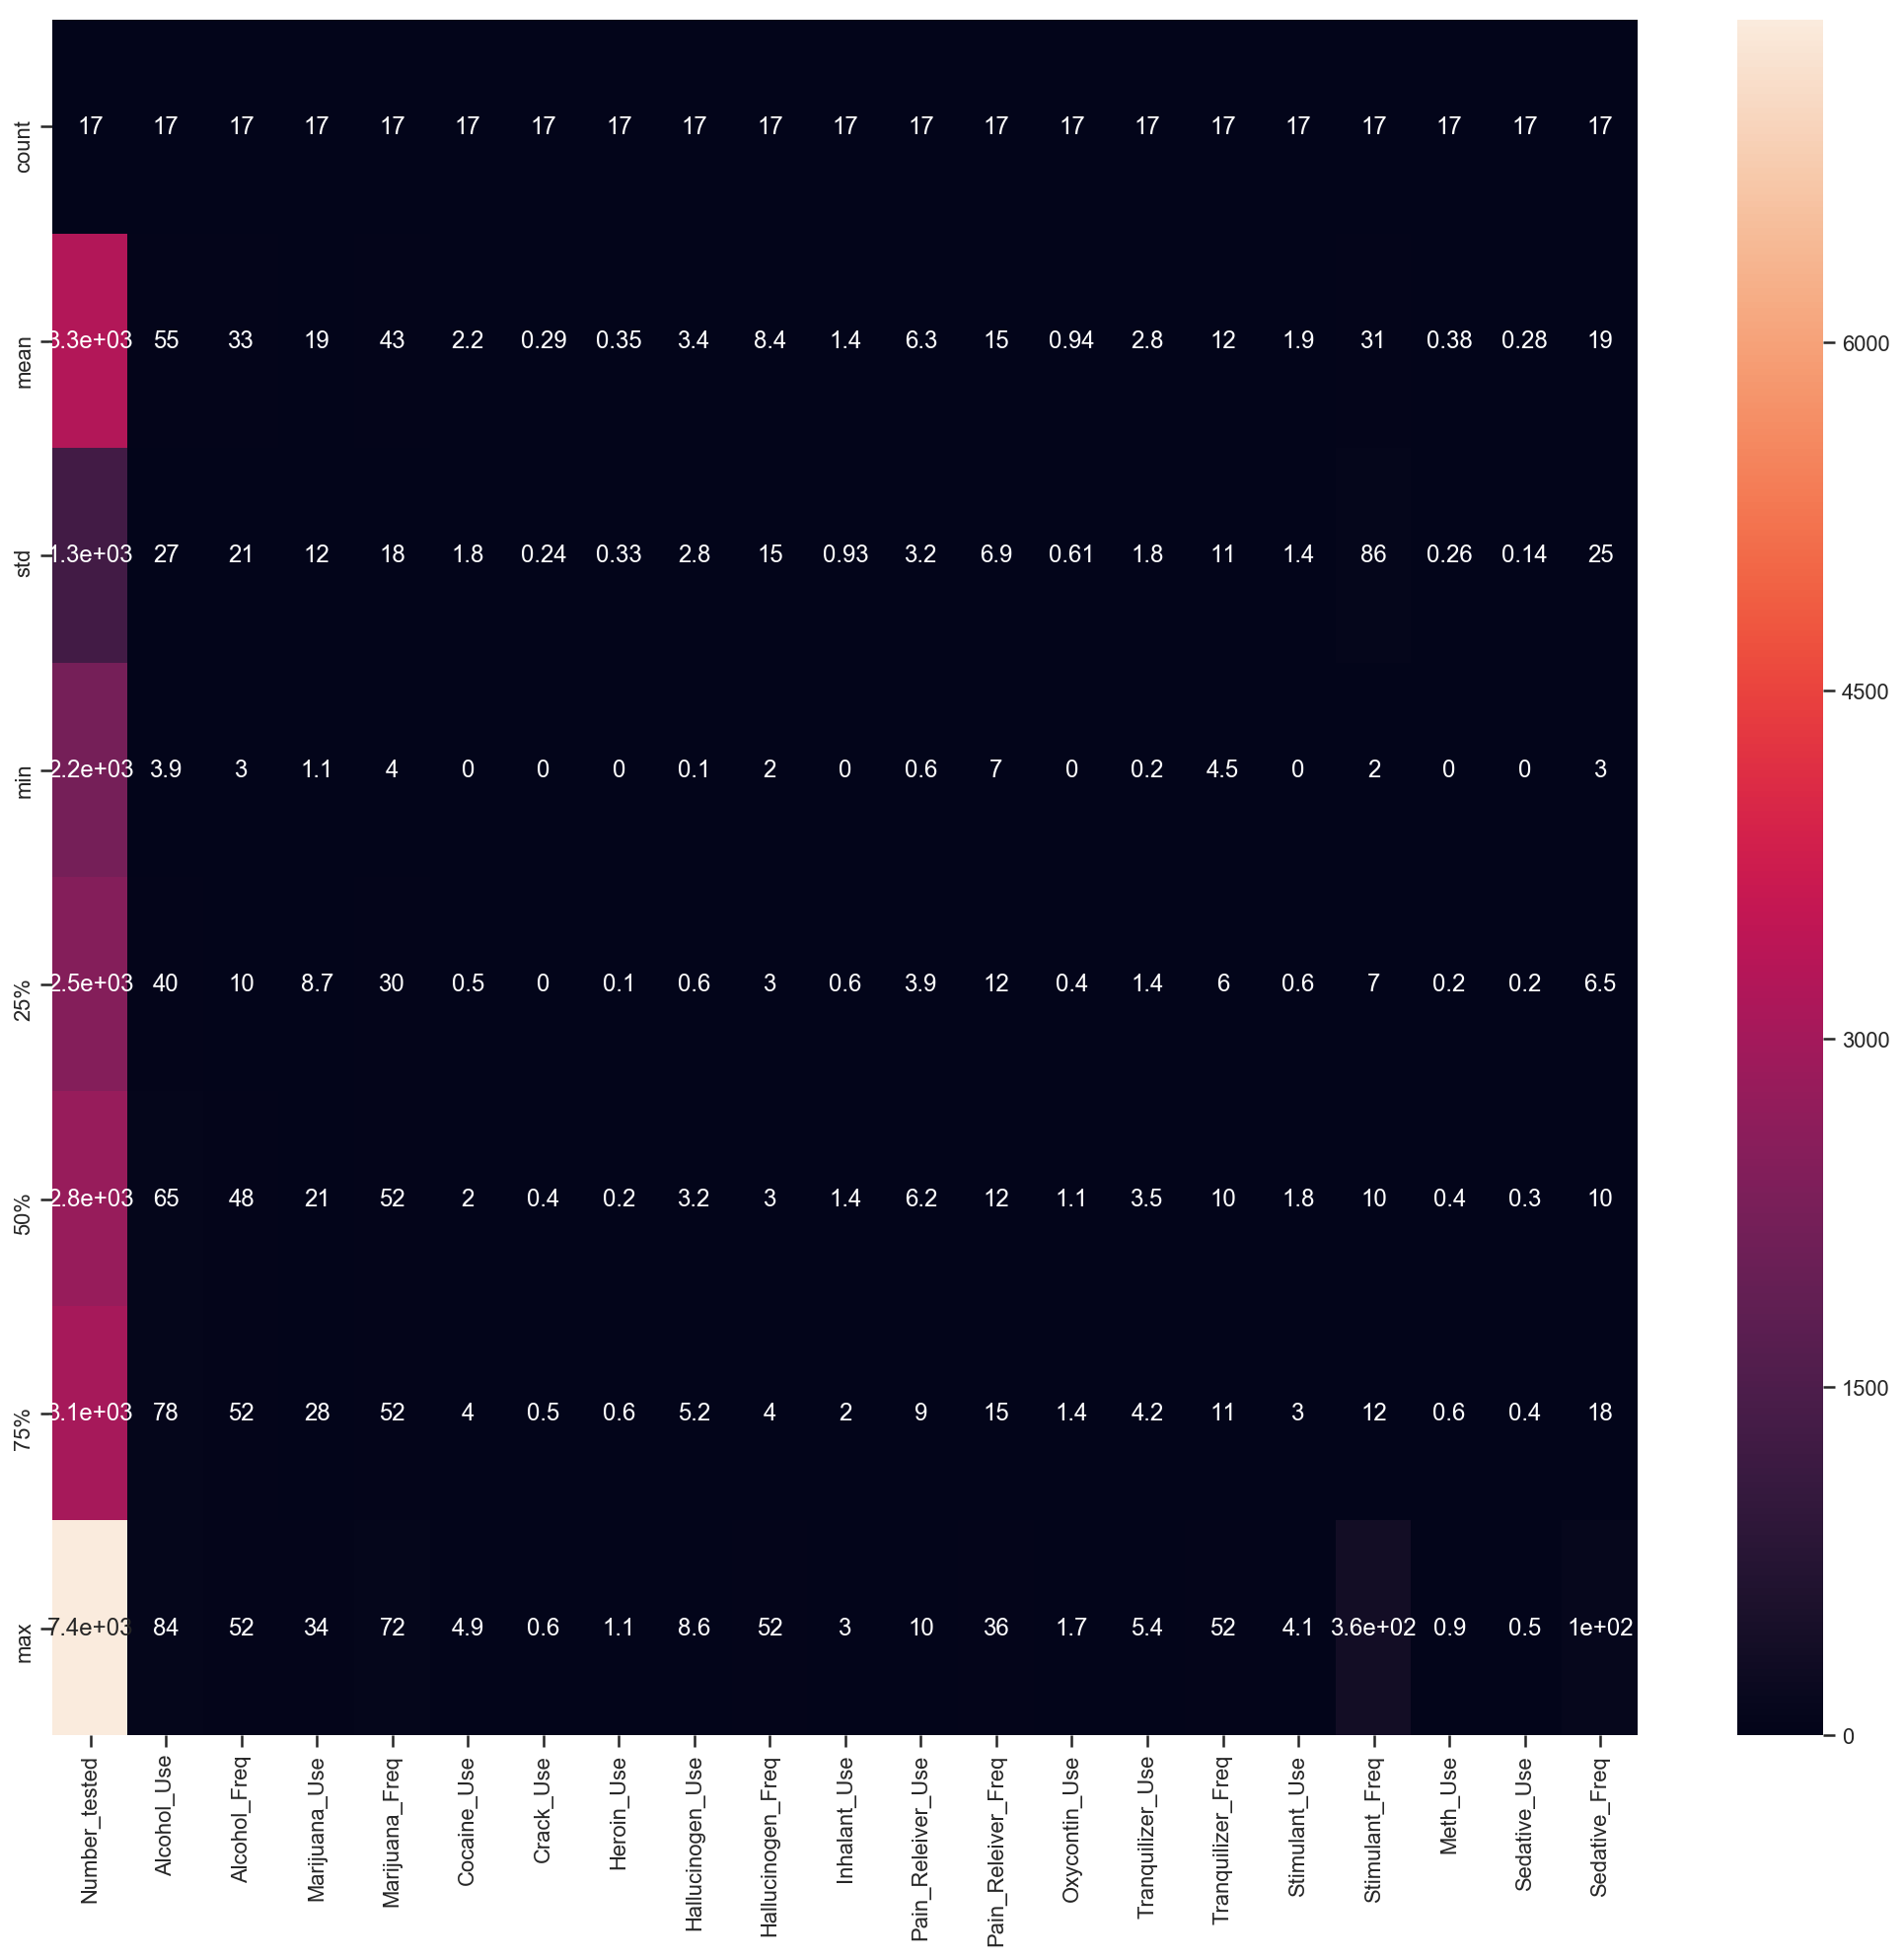

In [199]:
# 4. Plot a heatmap

plt.figure(figsize=(18, 16))
sns.heatmap(drug_use_age_df.describe(), annot=True)


In [200]:
# 5.-- Look for relationships between variables and subsets of those variables' values

# Finding the mean of the Number of people tested age-wise.
number_of_tested_mean = drug_use_age_df['Number_tested'].mean()
print('Mean = ',number_of_tested_mean)

Mean =  3251.0588235294117


In [201]:
# 6. -- Dataframe data types before.-- BEFORE
drug_use_age_df.columns
drug_use_age_df.dtypes

Age                    object
Number_tested           int64
Alcohol_Use           float64
Alcohol_Freq          float64
Marijuana_Use         float64
Marijuana_Freq        float64
Cocaine_Use           float64
Cocaine_Freq           object
Crack_Use             float64
Crack_Freq             object
Heroin_Use            float64
Heroin_Freq            object
Hallucinogen_Use      float64
Hallucinogen_Freq     float64
Inhalant_Use          float64
Inhalant_Freq          object
Pain_Releiver_Use     float64
Pain_Releiver_Freq    float64
Oxycontin_Use         float64
Oxycontin_Freq         object
Tranquilizer_Use      float64
Tranquilizer_Freq     float64
Stimulant_Use         float64
Stimulant_Freq        float64
Meth_Use              float64
Meth_Freq              object
Sedative_Use          float64
Sedative_Freq         float64
dtype: object

In [ ]:
# 8. Plotting the drug frquency columns
#ageIndex = drug_use_age_df['Age'].index()
#dict = dict(zip(range(17), ageIndex))
#dict

drug_freq_cols = [col_name for col_name in drug_use_age_df.columns if 'Frequency' in col_name]
#drug_freq

#getting columns only for frequency
F = drug_use_age_df[drug_freq_cols]
freq_df = pd.DataFrame(F)
#freq_df.rename(index = dict, inplace=True)
freq_df.head()

In [ ]:
# Plotting line plot of Drug frequency 

fq = freq_df.plot.barh(figsize=(10, 8))
fq.set_title('Drug Frequency per age group', fontsize=20)

# Observation : Alcohol, Marijuana and Heroin drugs have used most frquently across the age group.
# Also, further analysis has been done on the total consumption of drug which is frequncy * usage

In [204]:
# 9. Plotting the drug usage columns

drug_use_cols = [col_name for col_name in drug_use_age_df.columns if 'Use' in col_name]
#drug_freq

#getting columns only for frequency
F = drug_use_age_df[drug_use_cols]
use_df = pd.DataFrame(F)
use_df.rename(index = dict, inplace=True)
use_df.describe()

Alcohol_Use  Marijuana_Use  Cocaine_Use  Crack_Use  Heroin_Use  \
count    17.000000      17.000000    17.000000  17.000000   17.000000   
mean     55.429412      18.923529     2.176471   0.294118    0.352941   
std      26.878866      11.959752     1.816772   0.235772    0.333762   
min       3.900000       1.100000     0.000000   0.000000    0.000000   
25%      40.100000       8.700000     0.500000   0.000000    0.100000   
50%      64.600000      20.800000     2.000000   0.400000    0.200000   
75%      77.500000      28.400000     4.000000   0.500000    0.600000   
max      84.200000      34.000000     4.900000   0.600000    1.100000   

       Hallucinogen_Use  Inhalant_Use  Pain_Releiver_Use  Oxycontin_Use  \
count         17.000000     17.000000          17.000000      17.000000   
mean           3.394118      1.388235           6.270588       0.935294   
std            2.792506      0.927283           3.166379       0.608216   
min            0.100000      0.000000           0.600000       0.000000   
25%            0.600000      0.600000           3.900000       0.400000   
50%            3.200000      1.400000           6.200000       1.100000   
75%            5.200000      2.000000           9.000000       1.400000   
max            8.600000      3.000000          10.000000       1.700000   

       Tranquilizer_Use  Stimulant_Use   Meth_Use  Sedative_Use  
count         17.000000      17.000000  17.000000     17.000000  
mean           2.805882       1.917647   0.382353      0.282353  
std            1.753379       1.407673   0.262762      0.138000  
min            0.200000       0.000000   0.000000      0.000000  
25%            1.400000       0.600000   0.200000      0.200000  
50%            3.500000       1.800000   0.400000      0.300000  
75%            4.200000       3.000000   0.600000      0.400000  
max            5.400000       4.100000   0.900000      0.500000

Text(0.5, 1.0, 'Drug Use per age group')

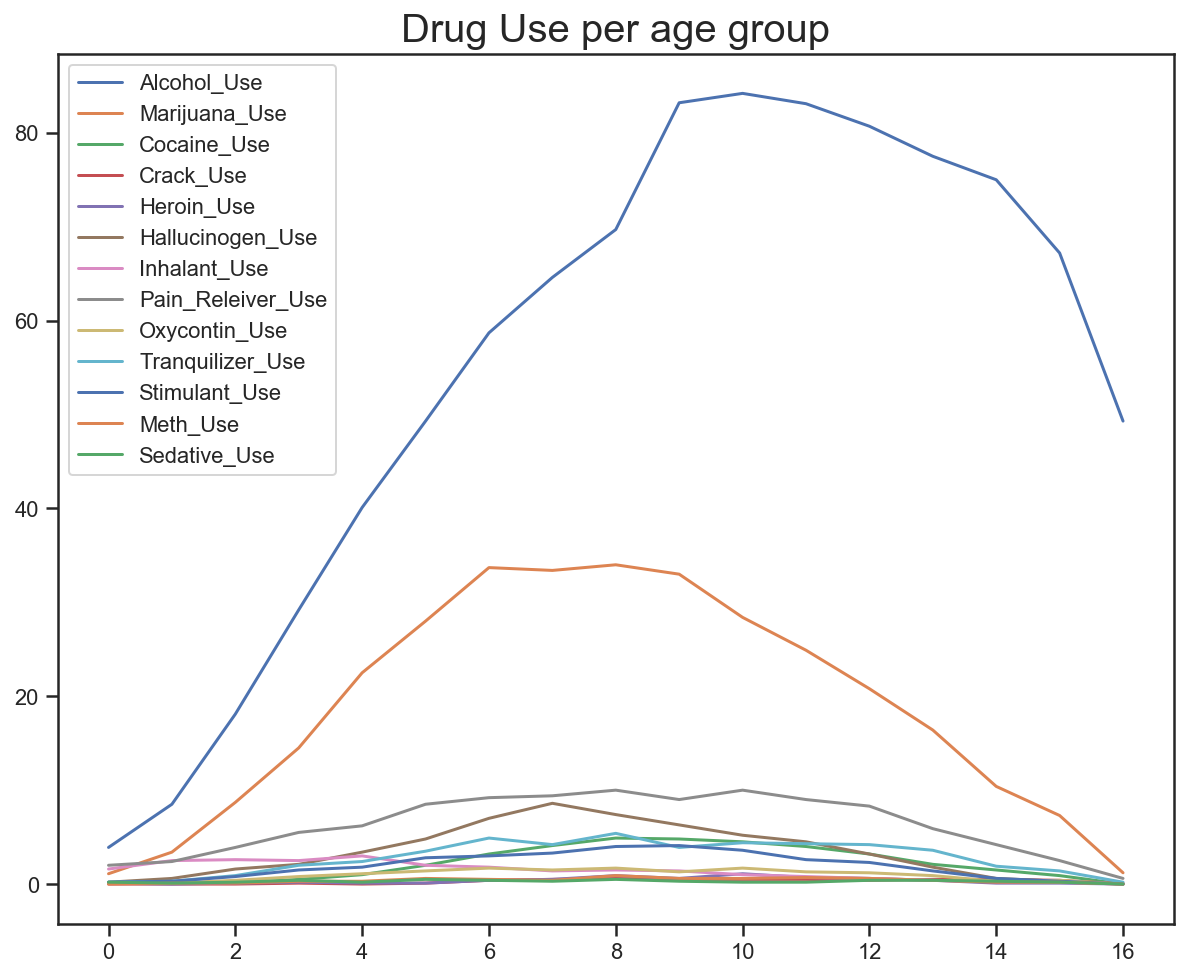

In [205]:
# Plotting line plot of Drug Usage 

us = use_df.plot(figsize=(10, 8))
us.set_title('Drug Use per age group', fontsize=20)

# Observations : Alcohol, Marijuana and Pain Releiver are highest used drugs across the age with the increase of all three 
                #when a person under test turned 20. Few drugs like Meth are not used as close to zero.

In [168]:
# 10. Derive new features from the ones available to help your analysis

# From all the substance stated as use and frequency, we can derive the consumption by simply multiplying the Amount use * frequency times.

d = {'Age_group' : [],'Alcohol_consumption': [], 'Marijuana_consumption': [], 'Cocaine_consumption' : [],
     'Crack_consumption' : [], 'Heroin_consumption' : [],'Hallucinogen_consumption' : [],
     'Inhalant_consumption' : [], 'Pain_releiver_consumption' : [],'Oxycontin_consumption' : [],
     'Tranquilizer_consumption' : [],'Stimulant_consumption' : [],
     'Meth_consumption' : [],'Sedative_consumption' : [] }



drug_use_age_new = pd.DataFrame(data=d)
#drug_use_age_new['Age_group']=drug_use_age_copy['Age']
drug_use_age_new

Empty DataFrame
Columns: [Age_group, Alcohol_consumption, Marijuana_consumption, Cocaine_consumption, Crack_consumption, Heroin_consumption, Hallucinogen_consumption, Inhalant_consumption, Pain_releiver_consumption, Oxycontin_consumption, Tranquilizer_consumption, Stimulant_consumption, Meth_consumption, Sedative_consumption]
Index: []

In [169]:
drug_use_age_new['Age_group'] = drug_use_age_df['Age']
drug_use_age_new

Age_group  Alcohol_consumption  Marijuana_consumption  \
0          12                  NaN                    NaN   
1          13                  NaN                    NaN   
2          14                  NaN                    NaN   
3          15                  NaN                    NaN   
4          16                  NaN                    NaN   
5          17                  NaN                    NaN   
6          18                  NaN                    NaN   
7          19                  NaN                    NaN   
8          20                  NaN                    NaN   
9          21                  NaN                    NaN   
10         22                  NaN                    NaN   
11         24                  NaN                    NaN   
12         27                  NaN                    NaN   
13         32                  NaN                    NaN   
14         42                  NaN                    NaN   
15         57                  NaN                    NaN   
16         65                  NaN                    NaN   

    Cocaine_consumption  Crack_consumption  Heroin_consumption  \
0                   NaN                NaN                 NaN   
1                   NaN                NaN                 NaN   
2                   NaN                NaN                 NaN   
3                   NaN                NaN                 NaN   
4                   NaN                NaN                 NaN   
5                   NaN                NaN                 NaN   
6                   NaN                NaN                 NaN   
7                   NaN                NaN                 NaN   
8                   NaN                NaN                 NaN   
9                   NaN                NaN                 NaN   
10                  NaN                NaN                 NaN   
11                  NaN                NaN                 NaN   
12                  NaN                NaN                 NaN   
13                  NaN                NaN                 NaN   
14                  NaN                NaN                 NaN   
15                  NaN                NaN                 NaN   
16                  NaN                NaN                 NaN   

    Hallucinogen_consumption  Inhalant_consumption  Pain_releiver_consumption  \
0                        NaN                   NaN                        NaN   
1                        NaN                   NaN                        NaN   
2                        NaN                   NaN                        NaN   
3                        NaN                   NaN                        NaN   
4                        NaN                   NaN                        NaN   
5                        NaN                   NaN                        NaN   
6                        NaN                   NaN                        NaN   
7                        NaN                   NaN                        NaN   
8                        NaN                   NaN                        NaN   
9                        NaN                   NaN                        NaN   
10                       NaN                   NaN                        NaN   
11                       NaN                   NaN                        NaN   
12                       NaN                   NaN                        NaN   
13                       NaN                   NaN                        NaN   
14                       NaN                   NaN                        NaN   
15                       NaN                   NaN                        NaN   
16                       NaN                   NaN                        NaN   

    Oxycontin_consumption  Tranquilizer_consumption  Stimulant_consumption  \
0                     NaN                       NaN                    NaN   
1                     NaN                       NaN                    NaN   
2                     N

In [179]:
drug_use_age_new['Alcohol_consumption'] = (drug_use_age_df['Alcohol_Use']/100) * drug_use_age_df['Alcohol_Freq']).astype('float')

SyntaxError: invalid syntax (<ipython-input-179-4c0df8113ab7>, line 1)

In [178]:
drug_use_age_new['Alcohol_consumption'] = drug_use_age_df['Alcohol_Use']/100) * drug_use_age_df['Alcohol_Freq']
drug_use_age_new['Marijuana_consumption'] = drug_use_age_df['Marijuana_Use']/100) * drug_use_age_df['Marijuana_Freq']
drug_use_age_new['Cocaine_consumption'] = drug_use_age_df['Cocaine_Use']/100) * drug_use_age_df['Cocaine_Freq']
drug_use_age_new['Crack_consumption'] = drug_use_age_df['Crack_Use']/100) * drug_use_age_df['Crack_Freq']
drug_use_age_new['Heroin_consumption'] = drug_use_age_df['Heroin_Use']/100) * drug_use_age_df['Heroin_Freq']
drug_use_age_new['Hallucinogen_consumption'] = drug_use_age_df['Hallucinogen_Use']/100) * drug_use_age_df['Hallucinogen_Freq']
drug_use_age_new['Inhalant_consumption'] = drug_use_age_df['Inhalant_Use']/100) * drug_use_age_df['Inhalant_Freq']
drug_use_age_new['Pain_releiver_consumption'] = drug_use_age_df['Pain_Releiver_Use']/100) * drug_use_age_df['Pain_Releiver_Freq']
drug_use_age_new['Oxycontin_consumption'] = drug_use_age_df['Oxycontin_Use']/100) * drug_use_age_df['Oxycontin_Freq']
drug_use_age_new['Tranquilizer_consumption'] = drug_use_age_df['Tranquilizer_Use']/100) * drug_use_age_df['Tranquilizer_Freq']
drug_use_age_new['Stimulant_consumption'] = drug_use_age_df['Stimulant_Use']/100) * drug_use_age_df['Stimulant_Freq']
drug_use_age_new['Meth_consumption'] = drug_use_age_df['Meth_Use']/100) * drug_use_age_df['Meth_Freq']
drug_use_age_new['Sedative_consumption'] = (drug_use_age_df['Sedative_Use']/100) * drug_use_age_df['Sedative_Freq']).astype

drug_use_age_new

TypeError: cannot convert the series to <class 'float'>

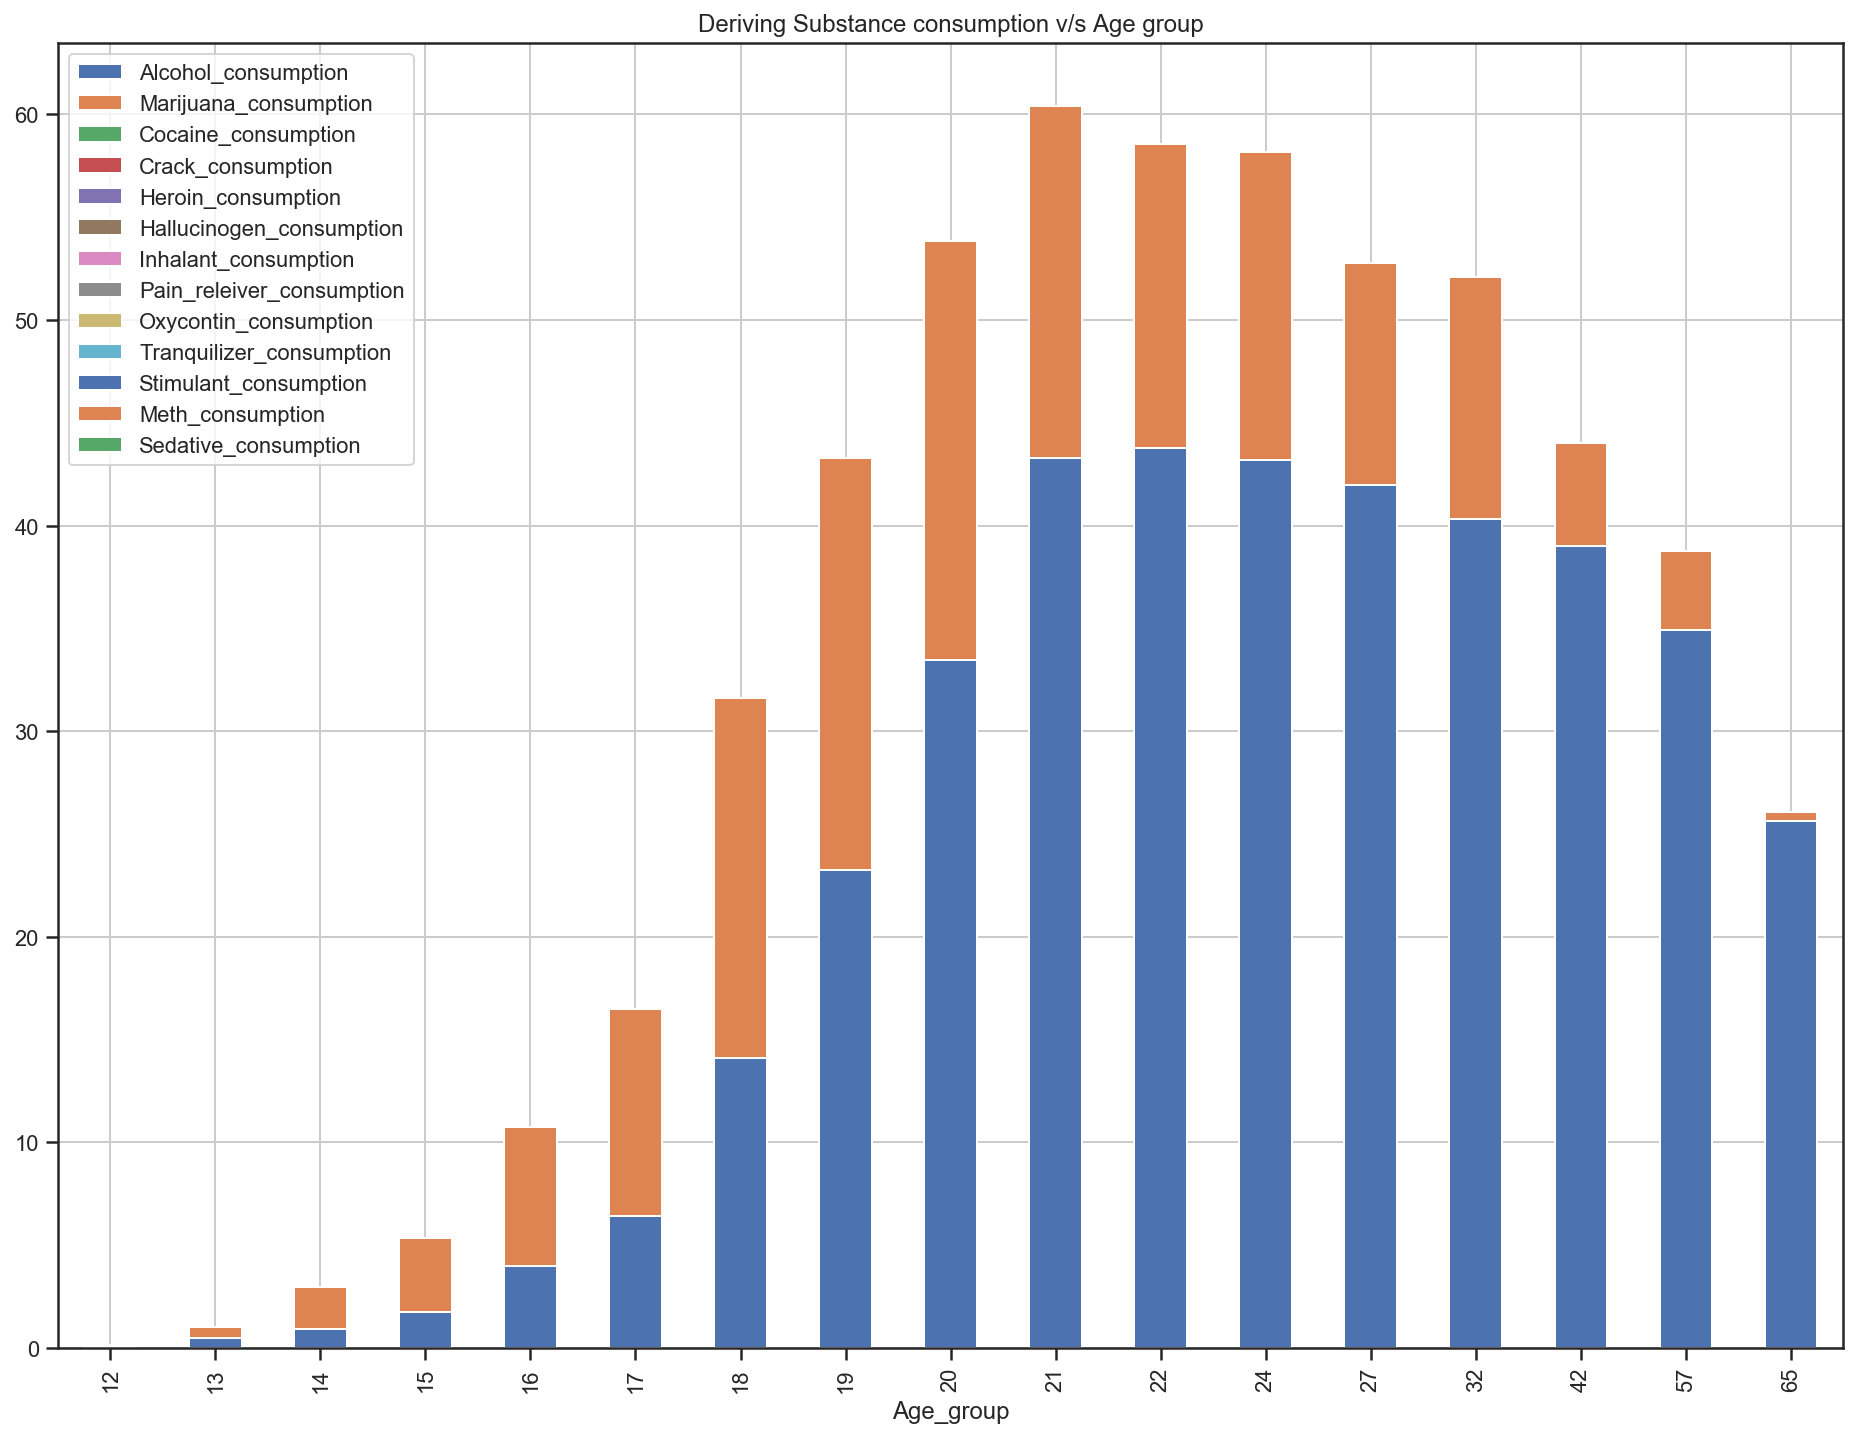

In [177]:
#drug_use_age_new.hist('Age_group', 'Alcohol_consumption', stacked=True, color='blue') 

ax = drug_use_age_new.plot(x='Age_group', y= ['Alcohol_consumption','Marijuana_consumption',
                                        'Cocaine_consumption','Crack_consumption',
                                         'Heroin_consumption','Hallucinogen_consumption',
                                         'Inhalant_consumption','Pain_releiver_consumption',
                                        'Oxycontin_consumption','Tranquilizer_consumption',
                                        'Stimulant_consumption','Meth_consumption',
                                         'Sedative_consumption'], kind='bar',stacked ='True',figsize=(16,12))

ax.yaxis.grid() # horizontal lines
ax.xaxis.grid() # vertical lines

plt.title('Deriving Substance consumption v/s Age group')
plt.show()


My Assumptions : Here I am referring substance to all drugs (including alcohol) used across the age-group in our data set.

EDA about : The above analysis shows which substance (including alcohol) was used the most across the age-groups.

Findings :
1. The Age group = 21 has the highest of any substance consumption.
2. Alcohol has the highest consumption in compare to all substances across all the age-gorup.
3. The consumption trend declines on both age-group extremes which is lower and higher groups.

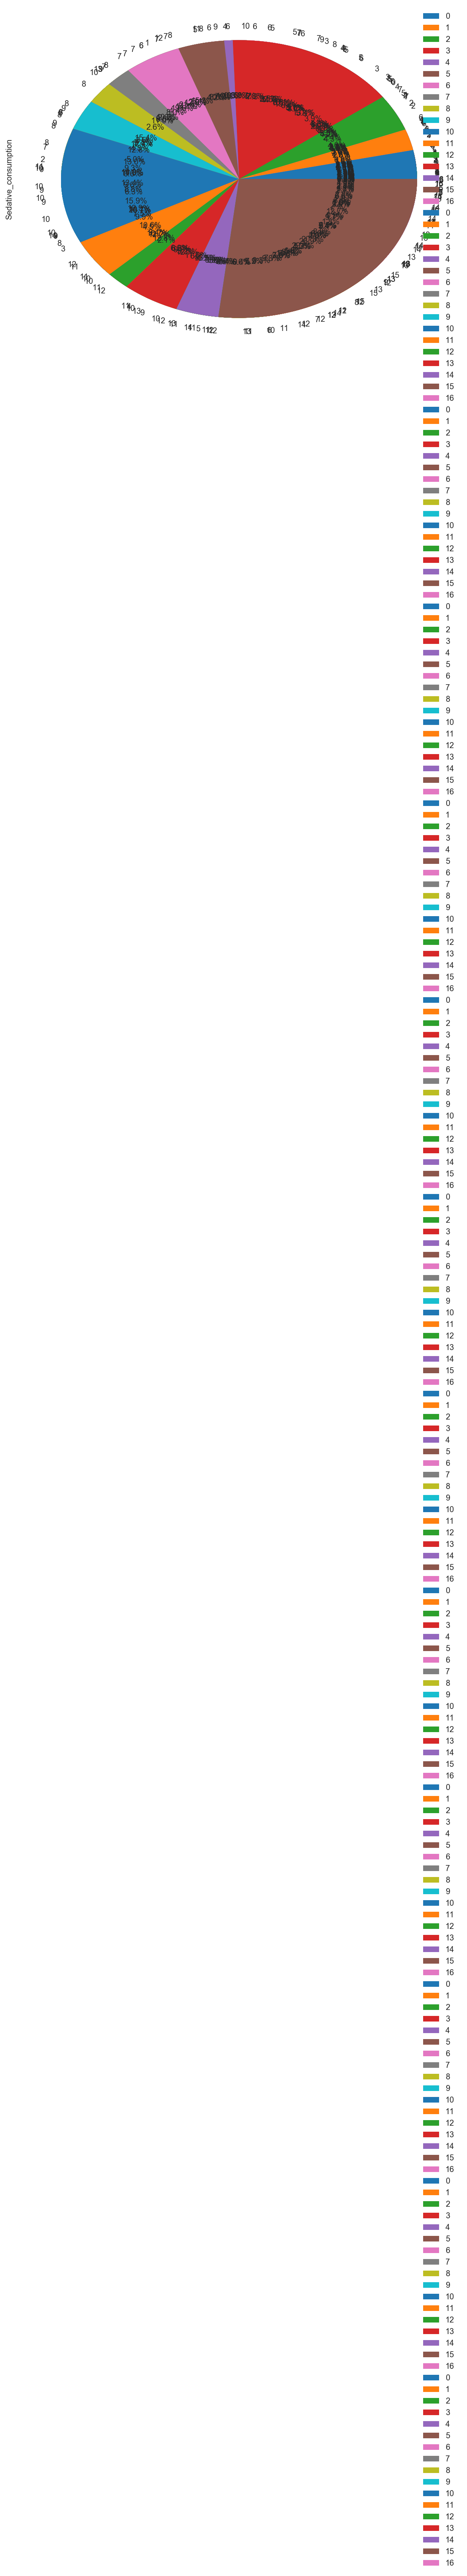

In [145]:
# Pie plot

plot = drug_use_age_new.plot.pie(y= ['Alcohol_consumption','Marijuana_consumption',
                                        'Cocaine_consumption','Crack_consumption',
                                         'Heroin_consumption','Hallucinogen_consumption',
                                         'Inhalant_consumption','Pain_releiver_consumption',
                                        'Oxycontin_consumption','Tranquilizer_consumption',
                                        'Stimulant_consumption','Meth_consumption',
                                         'Sedative_consumption'],autopct='%1.1f%%', figsize=(10, 8))


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

Hypothesis test ::
---

Assumptions : Two main age-groups formed from the given data set: 'Under_Age' -- 12-20, 'Adult_Age' -- 21-65+ 

Hypothesis Statement : Is the drug usage higher in the 'Under_Age' sample group or in 'Adult_Age' sample group ?

1. Define : Null Hypothesis : The drug consumption mean is same for 'Under_Age' and 'Adult_Age' sample group

2. Define : Alternate Hypothesis : The drug consumption mean is equal or higher for 'Under_Age' and 'Adult_Age' sample group.



The 7-Step Process of Statistical Hypothesis :
1. State the Null Hypothesis (H0)
2. State the Alternate Hypothesis(Ha)
3. Set alpha
4. Collect Data
5. Calculate a test statistic
6. Construct Acceptance/Rejection regions.
7. Based on steps 5 and 6, draw a conclusion about H0

In [62]:
# Step 1 and 2 : Defining a Null Hypothesis (Ho) and Alternate Hypothesis (Ha) for hypothesis testing.

# Defining a new data frame for hypothesis testing.
drug_use_age_x = pd.DataFrame() 

 # Making a deep copy which is copying all data from the main data frame
drug_use_age_x = drug_use_age_new.copy()

# Print the data frame.
#drug_use_age_x


In [63]:
## Step 3: alpha = 0.05.
alpha = 0.05

In [64]:
# Step 4 : Two group of vaues from adding each column of the sustance use only(frequency not included)

# Age_group = 22 to 65+ as sample set 1
Adult_Age = np.array([517.0,109.4,16.2,2.8,3.0,15.7,3.3,40.5,5.8,20.0,10.8,2.7,1.7])

# Age_group = 12 to 21 as sample set 2
Under_Age = np.array([425.3, 212.3, 20.8, 2.2, 3.0, 42.0, 20.3, 66.1, 10.1, 27.7, 21.8, 3.8, 3.1])

# Print mean, median and standard deviation values of both sample sets.
print('Under_Age mean :',np.mean(Under_Age))
print('Adult_Age mean :',np.mean(Adult_Age))
print('Under_Age median :',np.median(Under_Age))
print('Adult_Age median :',np.median(Adult_Age))

# Print the mean difference of the sample sets.
print('The Mean difference is:' , np.mean(Under_Age) - np.mean(Adult_Age))


Under_Age mean : 66.03846153846153
Adult_Age mean : 57.607692307692304
Under_Age median : 20.8
Adult_Age median : 10.8
The Mean difference is: 8.43076923076923


In [65]:
# Step 5 : Calculate the t-statistics

# Option 1 : Calculate t-stat value through formula.

# s (square) formula manually written below or use scipy package as one line code for it.
def sample_variance(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    dev1 = np.sum([(x - np.mean(sample1))**2 for x in sample1])
    dev2 = np.sum([(x - np.mean(sample2))**2 for x in sample2])
    s2 = float(dev1 + dev2) / (n1 + n2 - 2)
    return s2

def t_statistic(Adult_Age, Under_Age):
    s2 = sample_variance(Adult_Age, Under_Age)
    mean1 = np.mean(Adult_Age)
    mean2 = np.mean(Under_Age)
    std = np.sqrt(s2 * (1./len(Adult_Age) + 1./len(Under_Age)))
    return float(mean1 - mean2) / std

t_stat = t_statistic(Adult_Age, Under_Age)
print('Manual t-statistic:', t_stat)

Manual t-statistic: -0.16316898360592053


In [66]:
# Step 5 : Calculate the t-statistics

# Option 2 : Calculate t_stat using scipy

import scipy.stats as stats

stats.ttest_ind(Under_Age, Adult_Age)
#stats.ttest_ind(Adult_Age, Under_Age)

Ttest_indResult(statistic=0.16316898360592053, pvalue=0.8717515771030937)

In [67]:
# p-value /2 -- to get two-tailed value.
pvalue = 0.871751577103093

if pvalue < alpha:
    print("We reject our null hypothesis and conclude that there is a mean difference in the sample groups.")
elif pvalue > alpha:
    print("We fail to reject our null hypothesis and cannot conclude that there is no mean difference between the sample groups .")
else:
    print("Our test is inconclusive.")

We fail to reject our null hypothesis and cannot conclude that there is no mean difference between the sample groups .


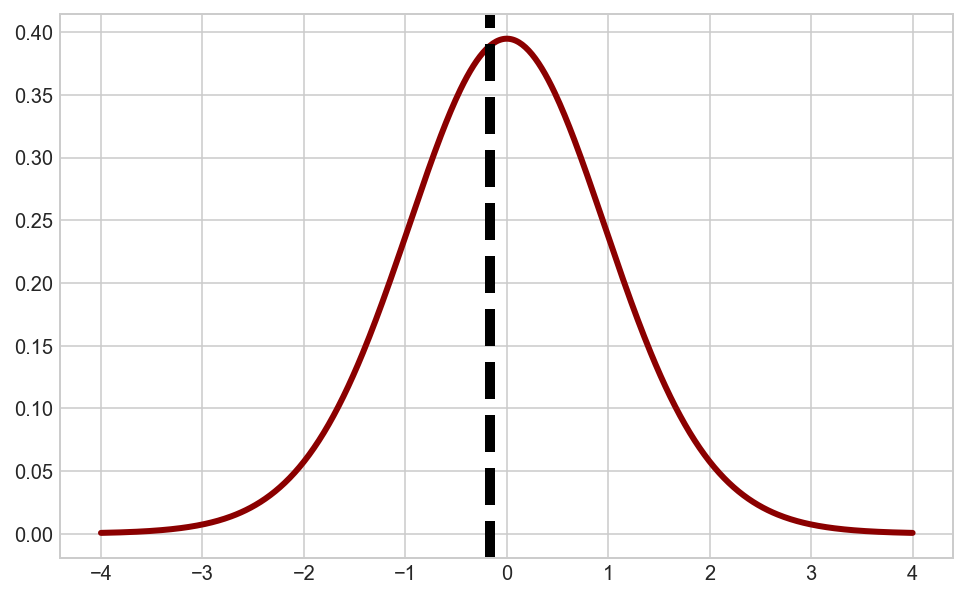

In [68]:
# Step 6 : Construct the Acceptance and Rejection regions.

# Option 1 : One-tail plot, showing the the Null hypothesis is not rejected as mean closer to 0.
t_stat = t_statistic(Adult_Age, Under_Age)
# generate points on the x axis between -4 and 4:
xpoints = np.linspace(-4, 4, 500) # linspace is the clean way to represent

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom: n1 + n2 - 2
ypoints = stats.t.pdf(xpoints, (13+13-2), 0, 1)

# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t_stat, color='black', linestyle='--', lw=5)

C:\Users\Home\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Home\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


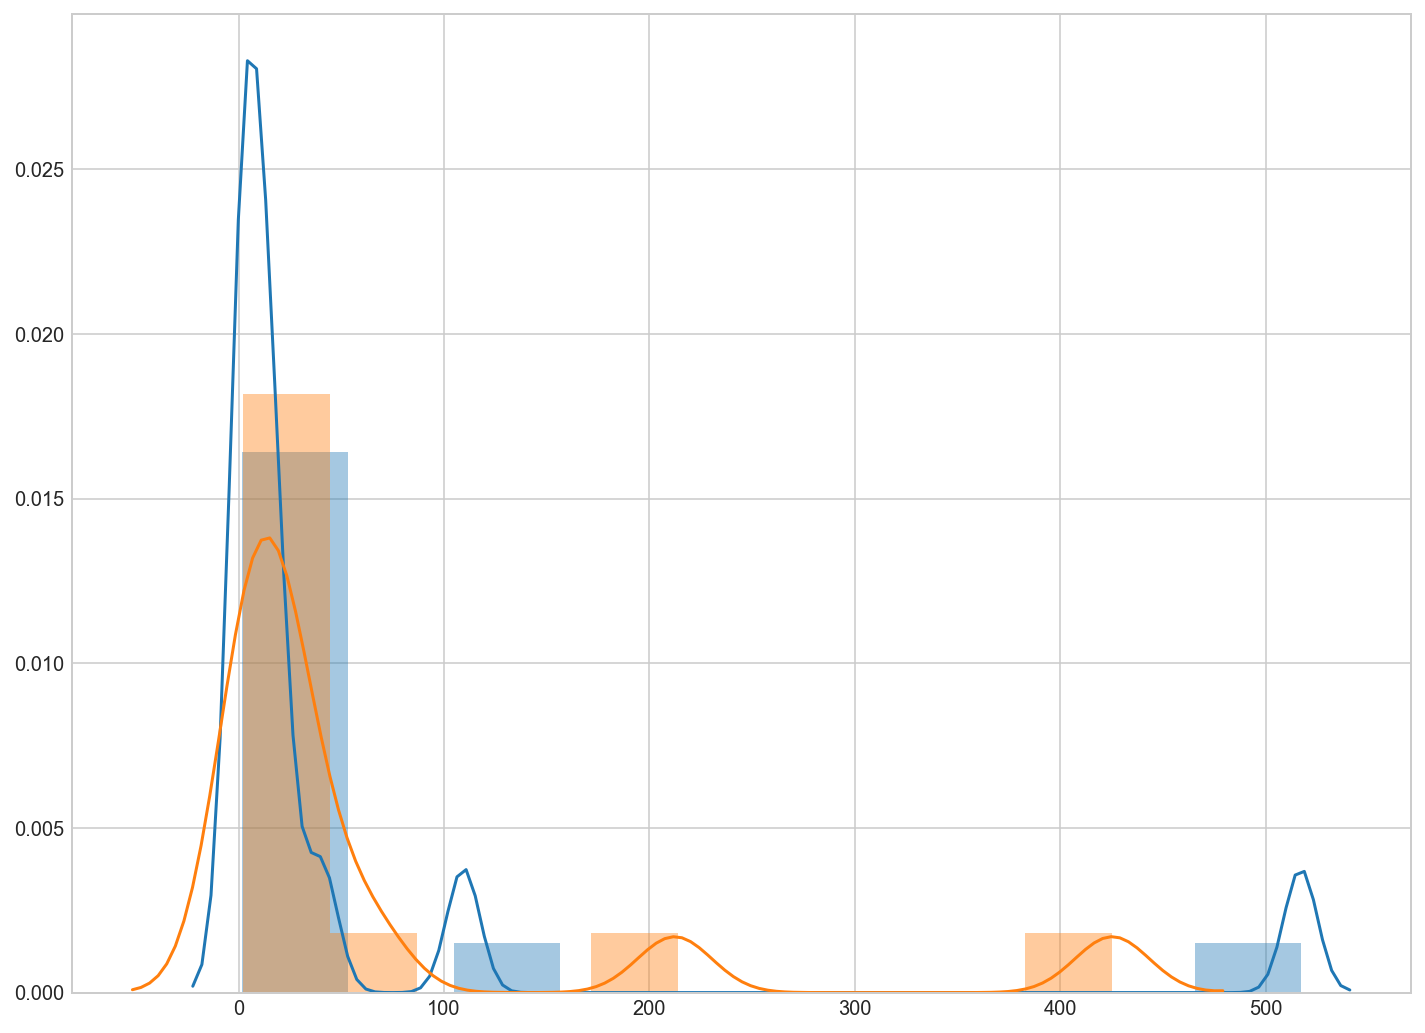

In [160]:
# Option 2:

#plt.plot(Adult_Age, Under_Age,'o')
#plt.title('corr = {0:.3f}, p = {1:.3f}'.format(pearsonlist[0],pearsonlist
#plt.xlabel('Adult_Age')
#plt.ylabel('Under_Age')
plt.figure(figsize=(12,9))
sns.distplot(Adult_Age, bins = 10)
sns.distplot(Under_Age, bins = 10)

----
**Report**
-----

We have plot here the drug-use in two groups and assumed that there is age factor is independent on the drugs usage across the two sample groups. From the plot, the Null hypothesis seems to be right as the distribution is centered on zero, where a value of 0 corresponds to our null hypothesis. The black dotted vertical line is our measured t-statistic.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [67]:
# Creating a copy of the Sat data frame.
sat_scores_rate_out = sat_scores_dict_df.copy(deep=True)
sat_scores_rate_out

# Q 8.1 -- Drop the Rate variable from the Sat dataset.
sat_scores_rate_out = sat_scores_rate_out.drop('Rate', axis=1) # axis = 1 is for columns
#sat_scores_rate_out = sat_scores_rate_out.drop('Difference', axis=1) 

# Print and verify the 'Rate' column
sat_scores_rate_out.head(5)

State  Verbal   Math  Difference
0    CT   509.0  510.0        -1.0
1    NJ   499.0  513.0       -14.0
2    MA   511.0  515.0        -4.0
3    NY   495.0  505.0       -10.0
4    NH   520.0  516.0         4.0

# Q8.2 -- The below two plots shows there are outliers in Math dataset for the 

Answer
1. 'Verbal' and 'Math' data set have very close mean value of 532 and 531.5 respectively.
2. From the plot of both data sets, we can see the first dataset - 'Verbal' has values more spread out and second dataset 'Math' has a outlier which is state 'OH'(Ohio) with score as 439.
3. We need to clean up the dataset and remove the outlier.
4. Numerically, we can define removing outliers data values by eliminating that were above (Mean + 2*SD) and were below (Mean - 2*SD).

# For Verbal dataset

mean_v = 532
sd_v = 33

outlier_v = [x for x in sat_scores_dict_out if (x > mean_v - 2 * sd_v)]
outlier_v = [x for x in outlier_v if (x < mean_v + 2 * sd_v)]
print(outlier_v)

# For Math dataset
mean_m = 531.500000
sd_m = 36.014975

outlier_m = [k for k in sat_scores_dict_out if (k> mean_m - 2 * sd_m)]
outlier_m = [k for k in outlier_m if (k < mean_m + 2 * sd_m)]
print(outlier_m)

In [68]:
# Describe the data set values.
sat_scores_rate_out.describe()

Verbal        Math  Difference
count   52.000000   52.000000   52.000000
mean   532.019231  531.500000    0.519231
std     33.236225   36.014975   15.729939
min    482.000000  439.000000  -30.000000
25%    501.000000  504.000000   -6.000000
50%    526.500000  521.000000    0.000000
75%    562.000000  555.750000    4.250000
max    593.000000  603.000000   95.000000

In [69]:
# Printing the coorelation matrix
sat_scores_rate_out.corr()

Verbal      Math  Difference
Verbal      1.000000  0.899871    0.052600
Math        0.899871  1.000000   -0.388219
Difference  0.052600 -0.388219    1.000000

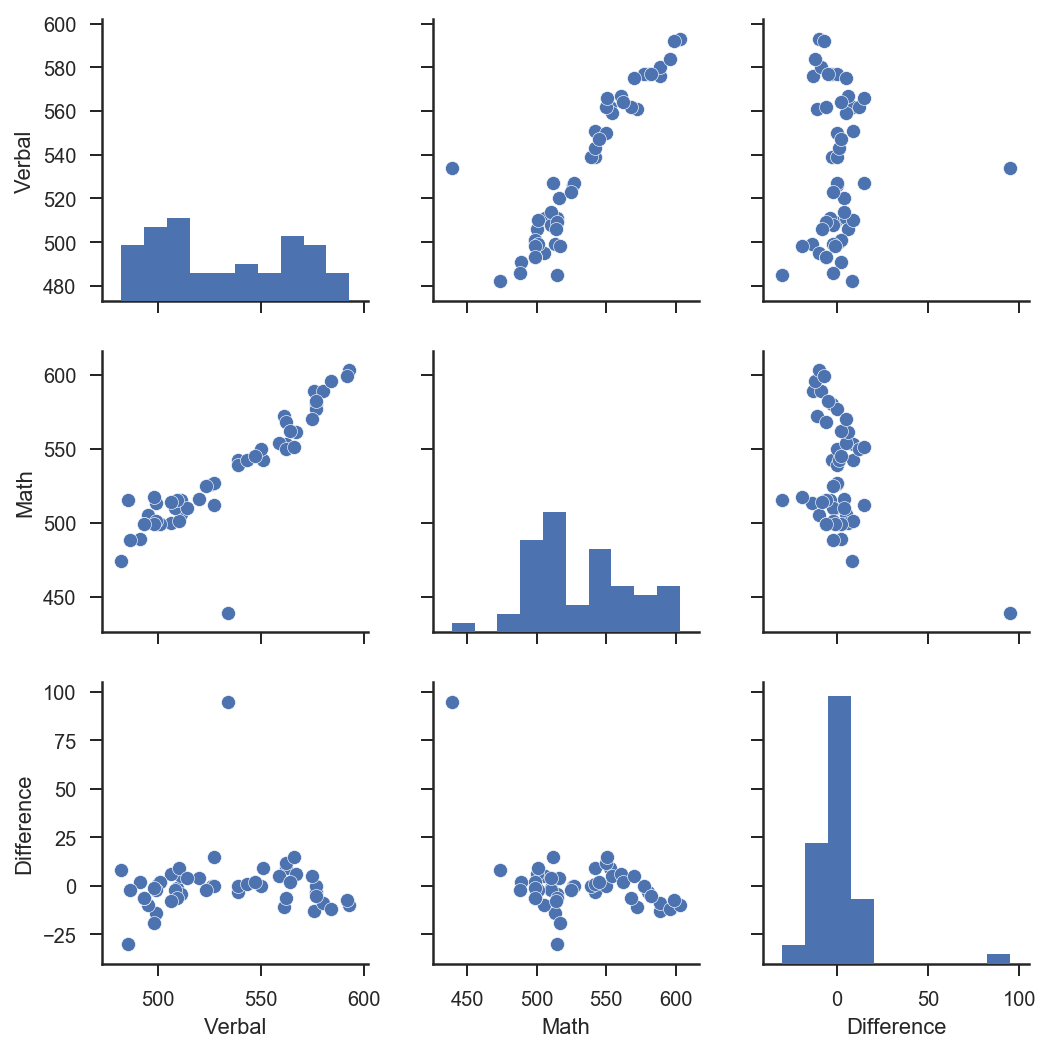

In [70]:
# Plotting the coorelation matrix
sns.pairplot(sat_scores_rate_out)

AxesSubplot(0.125,0.125;0.775x0.755)


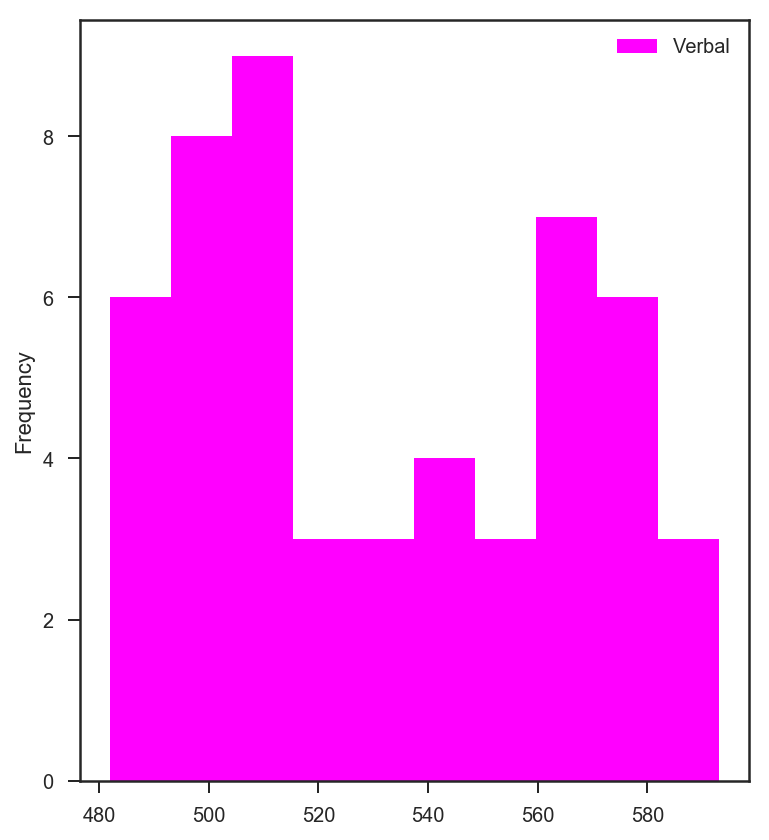

In [71]:
# Printing the Verbal data set to plot the distribtion of the data values BEFORE removing outliers.

print(sat_scores_rate_out.plot(x='State', y='Verbal', kind='hist',figsize=(6,7),bins=10,colormap='spring'))

AxesSubplot(0.125,0.125;0.775x0.755)


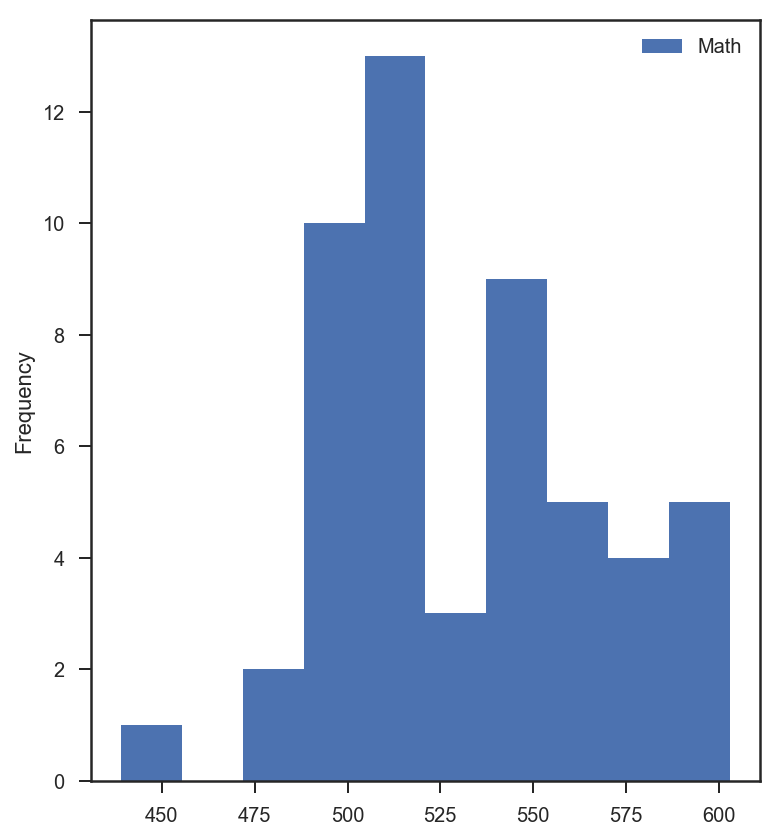

In [72]:
# Printing the Verbal data set to plot the distribtion of the data values BEFORE removing outliers.

print(sat_scores_rate_out.plot(x='State', y='Math', kind='hist',figsize=(6,7),bins=10))

Q 8.3 -- Print out the outliers from the datasets.

About 68% of values drawn from a normal distribution are within one standard deviation σ away from the mean; about 95% of the values lie within two standard deviations; and about 99.7% are within three standard deviations.

I will be selecting the Confidence interval/level as 95 % which implies removing outliers will be by above (Mean + 2SD) and below (Mean - 2SD) so that the 439 Math score of state OH can be removed.


In [73]:
# Printing the outliers for Math and Verbal dataset.

# Firstly for Verbal dataset
mean_verbal_score = sat_scores_rate_out['Verbal'].mean()
std_verbal_score = 2 * sat_scores_rate_out['Verbal'].std()

# Calculating the lower and higher limits.
lower_outlier_verbal = mean_verbal_score - std_verbal_score
higher_outlier_verbal = mean_verbal_score + std_verbal_score

print('1. Mean Verbal score is =' , mean_verbal_score)
print('2. Std dev Verbal score is=',std_verbal_score)
print('3. Mean - 2SD = ', lower_outlier_verbal)
print('4. Mean + 2SD = ' , higher_outlier_verbal)

1. Mean Verbal score is = 532.0192307692307
2. Std dev Verbal score is= 66.4724508875556
3. Mean - 2SD =  465.5467798816751
4. Mean + 2SD =  598.4916816567863


In [74]:
# Secondly for Math dataset
mean_math_score = sat_scores_rate_out['Math'].mean()
std_math_score = 2 * sat_scores_rate_out['Math'].std()

# Calculating the lower and upper limits.
lower_outlier_math = mean_math_score - std_math_score
higher_outlier_math = mean_math_score + std_math_score

print('1. Mean Math score is =' , mean_math_score)
print('2. Std dev Math score is=',std_math_score)
print('3. Mean - 2SD = ', lower_outlier_math)
print('4. Mean + 2SD = ' , higher_outlier_math)

1. Mean Math score is = 531.5
2. Std dev Math score is= 72.02995019774896
3. Mean - 2SD =  459.470049802251
4. Mean + 2SD =  603.5299501977489


In [75]:
# Applying the lower and higher limits on the dataframe's Verbal column.
row_mask_verbal = (sat_scores_rate_out['Verbal'] < lower_outlier_verbal),(sat_scores_rate_out['Verbal'] > higher_outlier_verbal)

# Applying the lower and higher limits on the dataframe's Math column.
row_mask_math = (sat_scores_rate_out['Math'] < lower_outlier_math),(sat_scores_rate_out['Math'] > higher_outlier_math)

In [76]:
# Finding the Outlier in the Sat score dataset with the highest difference of verbal and math score.

out_math = sat_scores_rate_out['Difference'] == sat_scores_rate_out['Difference'].max()
outlier = sat_scores_rate_out.loc[out_math]

# Print and verify.
outlier

State  Verbal   Math  Difference
27    OH   534.0  439.0        95.0

In [77]:
# Removing the Outlier from the dataframe.
df_clean =pd.DataFrame()
df_clean = sat_scores_rate_out.copy()
df_clean = df_clean.drop(27)
df_clean

State  Verbal   Math  Difference
0     CT   509.0  510.0        -1.0
1     NJ   499.0  513.0       -14.0
2     MA   511.0  515.0        -4.0
3     NY   495.0  505.0       -10.0
4     NH   520.0  516.0         4.0
5     RI   501.0  499.0         2.0
6     PA   500.0  499.0         1.0
7     VT   511.0  506.0         5.0
8     ME   506.0  500.0         6.0
9     VA   510.0  501.0         9.0
10    DE   501.0  499.0         2.0
11    MD   508.0  510.0        -2.0
12    NC   493.0  499.0        -6.0
13    GA   491.0  489.0         2.0
14    IN   499.0  501.0        -2.0
15    SC   486.0  488.0        -2.0
16    DC   482.0  474.0         8.0
17    OR   526.0  526.0         0.0
18    FL   498.0  499.0        -1.0
19    WA   527.0  527.0         0.0
20    TX   493.0  499.0        -6.0
21    HI   485.0  515.0       -30.0
22    AK   514.0  510.0         4.0
23    CA   498.0  517.0       -19.0
24    AZ   523.0  525.0        -2.0
25    NV   509.0  515.0        -6.0
26    CO   539.0  542.0        -3.0
28    MT   539.0  539.0         0.0
29    WV   527.0  512.0        15.0
30    ID   543.0  542.0         1.0
31    TN   562.0  553.0         9.0
32    NM   551.0  542.0         9.0
33    IL   576.0  589.0       -13.0
34    KY   550.0  550.0         0.0
35    WY   547.0  545.0         2.0
36    MI   561.0  572.0       -11.0
37    MN   580.0  589.0        -9.0
38    KS   577.0  580.0        -3.0
39    AL   559.0  554.0         5.0
40    NE   562.0  568.0        -6.0
41    OK   567.0  561.0         6.0
42    MO   577.0  577.0         0.0
43    LA   564.0  562.0         2.0
44    WI   584.0  596.0       -12.0
45    AR   562.0  550.0        12.0
46    UT   575.0  570.0         5.0
47    IA   593.0  603.0       -10.0
48    SD   577.0  582.0        -5.0
49    ND   592.0  599.0        -7.0
50    MS   566.0  551.0        15.0
51   All   506.0  514.0        -8.0

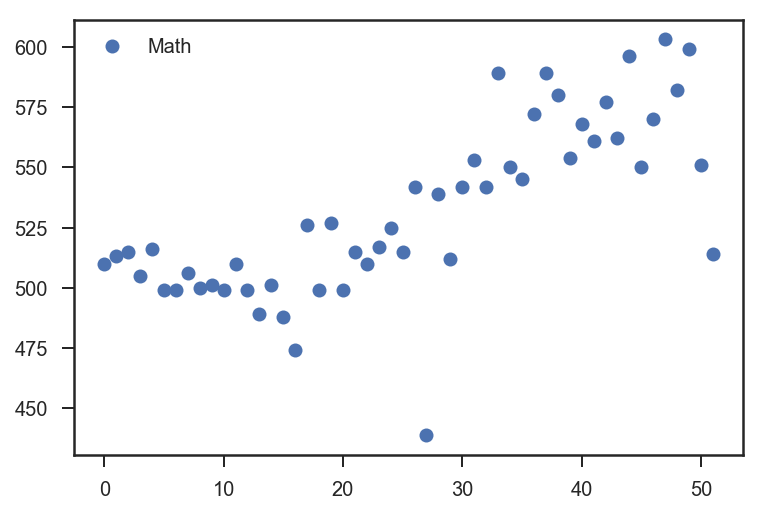

In [78]:
# Plotting the before and after removing outlier in Math score.

# New dataframe created for Math score.
m = {'Math':[]}
sat_scores_m = pd.DataFrame(data = m)
sat_scores_m['Math'] = sat_scores_rate_out['Math'] 

# sat_scores_math.head(2)

# Initial plot
sat_scores_m.plot(style ='o')

In [79]:
# final plot

sat_scores_m = sat_scores_m.drop(27)
#out = outliers(df = sat_scores_m, level=2)
#out.plot(style ='o')
#sat_scores_m

df_clean = outliers(df = sat_scores_dict_verbal, level = 2)


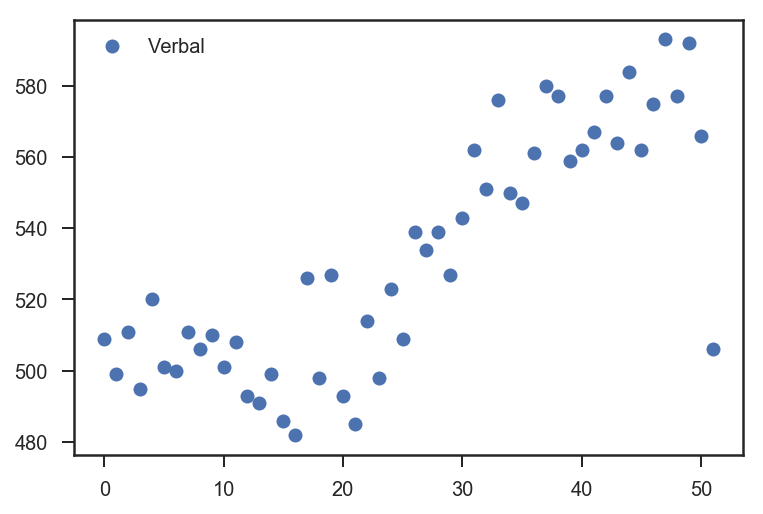

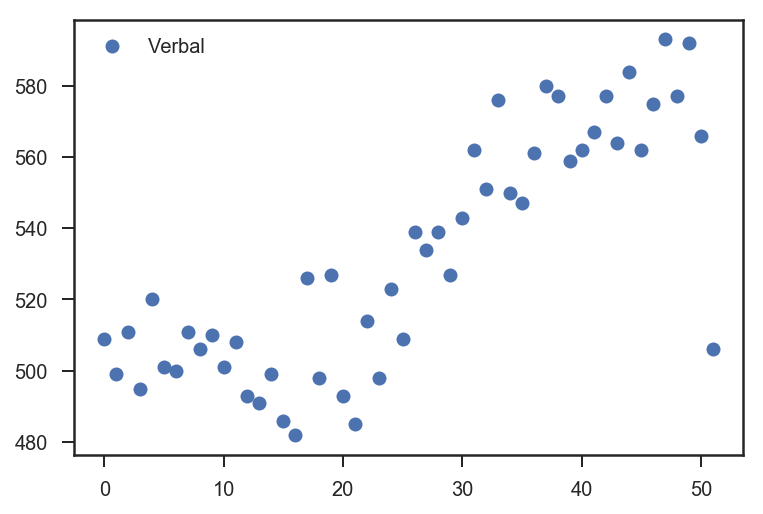

In [80]:
# Method 2 :  Removing outliers.
d = sat_scores_rate_out['Verbal']

# initial plot
sat_scores_dict_verbal = pd.DataFrame(data = d)
#sat_scores_dict_verbal.columns = ['d']
sat_scores_dict_verbal.plot(style = 'o')

# Function to identify and remove outliers
def outliers(df, level):

    # 1. temporary dataframe
    df = sat_scores_dict_verbal.copy(deep = True)

    # 2. Select a level for a Z-score to identify and remove outliers
    df_Z = df[(np.abs(stats.zscore(df)) < level).all(axis=1)]
    ix_keep = df_Z.index

    # 3. Subset the raw dataframe with the indexes you'd like to keep
    df_keep = df.loc[ix_keep]

    return(df_keep)

# remove outliers
level = 2
print("df_clean = outliers(df = sat_scores_dict_verbal, level = " + str(level)+')')
df_clean_v = outliers(df = sat_scores_dict_verbal, level = level)

# final plot
df_clean_v.plot(style = 'o')
#df_clean_v

df_clean = outliers(df = sat_scores_dict_math, level = 1.2)


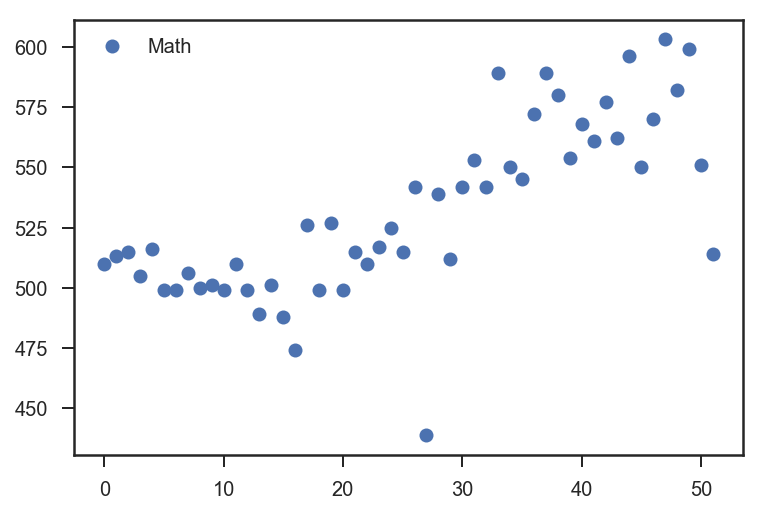

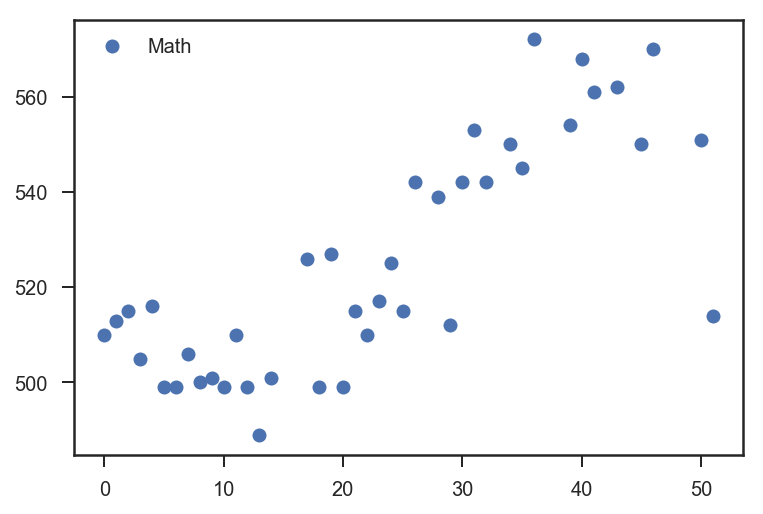

In [81]:
# your data (as a list)
m = sat_scores_rate_out['Math']

# initial plot
sat_scores_dict_math = pd.DataFrame(data = m)
#sat_scores_dict_math.columns = ['d']
sat_scores_dict_math.plot(style = 'o')

# Function to identify and remove outliers
def outliers(df, level):

    # 1. temporary dataframe
    df = sat_scores_dict_math.copy(deep = True)

    # 2. Select a level for a Z-score to identify and remove outliers
    df_Z = df[(np.abs(stats.zscore(df)) < level).all(axis=1)]
    ix_keep = df_Z.index

    # 3. Subset the raw dataframe with the indexes you'd like to keep
    df_keep = df.loc[ix_keep]

    return(df_keep)

# remove outliers
level = 1.2
print("df_clean = outliers(df = sat_scores_dict_math, level = " + str(level)+')')
df_clean_m = outliers(df = sat_scores_dict_math, level = level)

# final plot
df_clean_m.plot(style = 'o')

#df_clean_m

In [82]:
# Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. 

# 1.Main dataframe with outliers.
print(sat_scores_rate_out.describe())

# 2.Clean dataframe with Math data.
print(df_clean_m.describe())
# Differences observed : 9 outliers data points removed. Mean & Std dev is improved. Min & max values changed.

# 2.Clean dataframe with Verbal data.
print(df_clean_v.describe())
# Differences observed : 13 outliers data points removed. Mean & Std dev is improved. Min & max values changed.


           Verbal        Math  Difference
count   52.000000   52.000000   52.000000
mean   532.019231  531.500000    0.519231
std     33.236225   36.014975   15.729939
min    482.000000  439.000000  -30.000000
25%    501.000000  504.000000   -6.000000
50%    526.500000  521.000000    0.000000
75%    562.000000  555.750000    4.250000
max    593.000000  603.000000   95.000000
             Math
count   41.000000
mean   524.926829
std     24.088784
min    489.000000
25%    505.000000
50%    515.000000
75%    545.000000
max    572.000000
           Verbal
count   52.000000
mean   532.019231
std     33.236225
min    482.000000
25%    501.000000
50%    526.500000
75%    562.000000
max    593.000000


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


Ans 9.1.1: 
--
1. The Pearson correlation measures the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable.
2. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed i.e. it works on any two variables that are increasing or decreasing and not necessarily linear.Spearman's coorelation is based on co-efficients rank order.

2. The Pearson and Spearman correlation coefficients can range in value from −1 to +1, with 0 implying no correlation. 


In [83]:
# Finding and Plotting Pearson correlation for comparing with the spearman coorelation

# Converting the Verbal and Math columns from the dataframe to numpy array.
v_array = sat_scores_csv['Verbal'].values
m_array = sat_scores_csv['Math'].values
#type(v_array)

# One-way : Calculating covariance matrix with np.cov method.
covar = np.cov(v_array,m_array, bias=True)
# Second-way : Calculating covariance matrix with covariance formula.
covariance = np.sum((v_array - np.mean(v_array))*(m_array - np.mean(m_array)))/len(v_array)

# Print and verify.
print('1. The covarinace of Verbal and Math is =', covariance)
print('2. The covarinace matrix of Verbal and Math is =', covar)

# --------Pearson correlation : r = covariance (Verbal, Math)/sd(verbal)*sd(Math)----

# Method # 1. Calculating Pearson correlation using formula.
pearson_corr = covariance / (np.std(v_array) * np.std(m_array))

# Print and verify.
print('3. The Pearson correlation of Verbal and Math is r value =' , pearson_corr )

# Method # 2. Calculating Pearson correlation using np.corrcoef() method.
print('4. The Pearson correlation matrix using numpy corrcoef methosd and r value is =', np.corrcoef(v_array,m_array, bias=True))

# FINDINGS : The relationship between two variables -- Maths and Verbal is strong as their r value is greater than 0.7

# Method # 3. Calculating Pearson correlation using stats,pearsonr method.
corr_pearson, pval_pearson = stats.pearsonr(m_array,v_array)

# Print and verify.
print('5. The Pearson correlation using stats method and r value = ', corr_pearson)
print('6. The Pearson correlation using stats method and p value = ', pval_pearson)

1. The covarinace of Verbal and Math is = 1056.4326923076924
2. The covarinace matrix of Verbal and Math is = [[1083.40347633 1056.43269231]
 [1056.43269231 1272.13461538]]
3. The Pearson correlation of Verbal and Math is r value = 0.899870852544429
4. The Pearson correlation matrix using numpy corrcoef methosd and r value is = [[1.         0.89987085]
 [0.89987085 1.        ]]
5. The Pearson correlation using stats method and r value =  0.899870852544429
6. The Pearson correlation using stats method and p value =  1.192002673306768e-19


C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: bias and ddof have no effect and are deprecated


In [84]:
# Pearson dataframe
pearson = sat_scores_csv[['Verbal', 'Math']].corr(method='pearson')
pearson

Verbal      Math
Verbal  1.000000  0.899871
Math    0.899871  1.000000

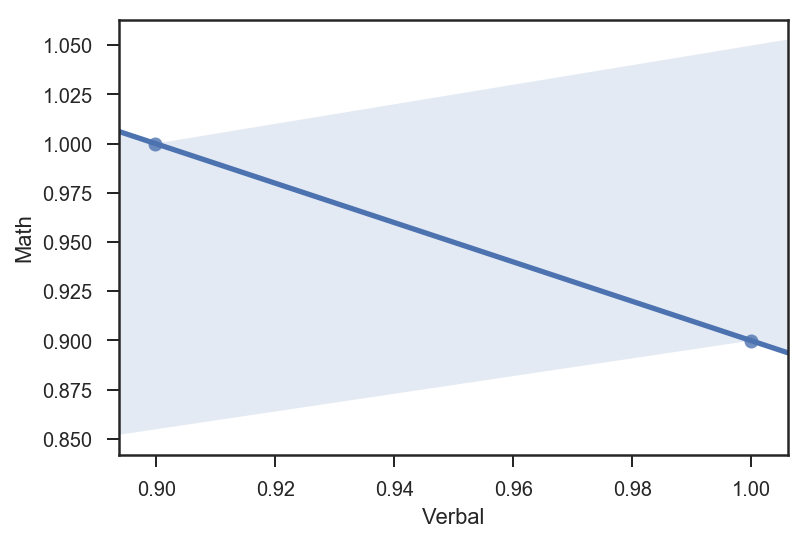

In [85]:
# Pearson correlation Regression plot

sns.regplot(x=pearson['Verbal'],y=pearson['Math'])
plt.show()

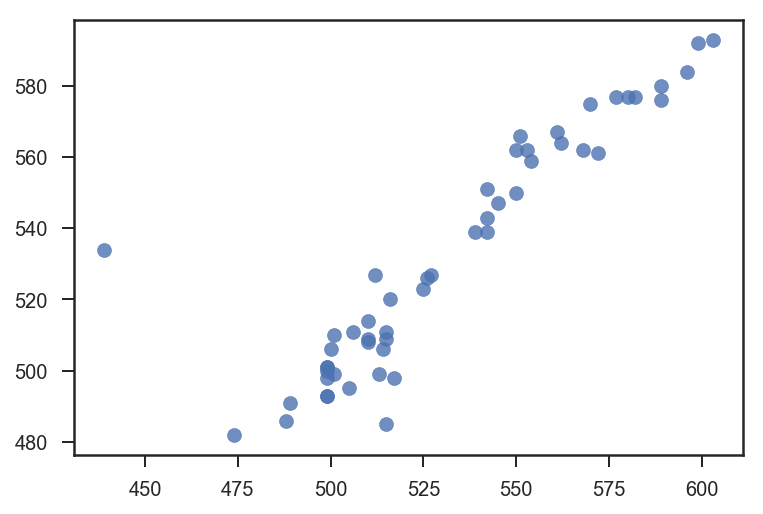

In [86]:
# Verbal and Math scatter plot

plt.scatter(m_array,v_array, alpha=0.8)
plt.show()

In [87]:
# Pre-work : Define a Empty list for extracting Verbal column
v = []

v = sat_scores_dict_df ['Verbal'].tolist()

# Define a Empty list for extracting Math column
m = []

m = sat_scores_dict_df ['Math'].tolist()

# Print and Verify
print('Verbal score= ' , v)
print('Math score=   ' , m)

Verbal score=  [509.0, 499.0, 511.0, 495.0, 520.0, 501.0, 500.0, 511.0, 506.0, 510.0, 501.0, 508.0, 493.0, 491.0, 499.0, 486.0, 482.0, 526.0, 498.0, 527.0, 493.0, 485.0, 514.0, 498.0, 523.0, 509.0, 539.0, 534.0, 539.0, 527.0, 543.0, 562.0, 551.0, 576.0, 550.0, 547.0, 561.0, 580.0, 577.0, 559.0, 562.0, 567.0, 577.0, 564.0, 584.0, 562.0, 575.0, 593.0, 577.0, 592.0, 566.0, 506.0]
Math score=    [510.0, 513.0, 515.0, 505.0, 516.0, 499.0, 499.0, 506.0, 500.0, 501.0, 499.0, 510.0, 499.0, 489.0, 501.0, 488.0, 474.0, 526.0, 499.0, 527.0, 499.0, 515.0, 510.0, 517.0, 525.0, 515.0, 542.0, 439.0, 539.0, 512.0, 542.0, 553.0, 542.0, 589.0, 550.0, 545.0, 572.0, 589.0, 580.0, 554.0, 568.0, 561.0, 577.0, 562.0, 596.0, 550.0, 570.0, 603.0, 582.0, 599.0, 551.0, 514.0]


In [88]:
# Q 9.1.2 Describe clearly in words the process of calculating the spearman rank correlation.

# Option 1 : Using Pearson co-eeficient corr. and then applying ranked versions to calculate Spearmans corr.

# Create a function that takes in v(verbal) and m(math)

def spearmans_rank_correlation(v, m):
    
    # Steps 1.1 : Calculate the rank of Verbal's score.
    v_ranks = pd.Series(v).rank()
    
    # Step 1.2 Caclulate the ranking of the Math's score
    m_ranks = pd.Series(m).rank()
    
    # Step 3 Calculate Pearson's correlation coefficient on the ranked versions of the data
    return scipy.stats.pearsonr(v_ranks, m_ranks)

# Run the function with index 0
spearmans_rank_correlation(v,m)[0:]

(0.9052048847940285, 3.235231959777449e-20)

In [89]:
# Option 2 :  Spearman's coorelation using Scipy spearman package.

scipy.stats.spearmanr(v, m)[0]

0.9052048847940284

In [90]:
# Option 3 -- Using the formula (Ref: http://www.statisticshowto.com/spearman-rank-correlation-definition-calculate/)

# Create a new dataframe
sp = {'Verbal': [], 'Rank_V' : [],'Math' : [], 'Rank_M' : [], 'data' : [], 'd_squared' : []}
sat_scores_spearmans = pd.DataFrame(data=sp)

# Copying only the variable column will need for Spearmans calculations. 
sat_scores_spearmans['Verbal']=sat_scores_csv['Verbal']
sat_scores_spearmans['Math']=sat_scores_csv['Math']

# Step 1 : Find ranks for Verbal and Math by sorting from greatest to smallest and updating their columns as rank 1 to last.

# Sort both columns - Verbal and Math
#sat_scores_spearmans.sort_values(by='Verbal', axis=0, ascending=False,inplace=True,kind='heapsort')
#sat_scores_spearmans.sort_values(by='Math', axis=0, ascending=False,inplace=True)

# Use .rank() method to rank values in descending order and store them into their respective rank columns.
sat_scores_spearmans['Rank_V'] = sat_scores_spearmans['Verbal'].rank(ascending=False)
sat_scores_spearmans['Rank_M'] = sat_scores_spearmans['Math'].rank(ascending=False)

# Print and verify
sat_scores_spearmans

Verbal  Rank_V  Math  Rank_M  data  d_squared
0      509    34.5   510    36.0   NaN        NaN
1      499    42.5   513    33.0   NaN        NaN
2      511    31.5   515    30.0   NaN        NaN
3      495    46.0   505    39.0   NaN        NaN
4      520    29.0   516    28.0   NaN        NaN
5      501    39.5   499    45.5   NaN        NaN
6      500    41.0   499    45.5   NaN        NaN
7      511    31.5   506    38.0   NaN        NaN
8      506    37.5   500    42.0   NaN        NaN
9      510    33.0   501    40.5   NaN        NaN
10     501    39.5   499    45.5   NaN        NaN
11     508    36.0   510    36.0   NaN        NaN
12     493    47.5   499    45.5   NaN        NaN
13     491    49.0   489    49.0   NaN        NaN
14     499    42.5   501    40.5   NaN        NaN
15     486    50.0   488    50.0   NaN        NaN
16     482    52.0   474    51.0   NaN        NaN
17     526    27.0   526    25.0   NaN        NaN
18     498    44.5   499    45.5   NaN        NaN
19     527    25.5   527    24.0   NaN        NaN
20     493    47.5   499    45.5   NaN        NaN
21     485    51.0   515    30.0   NaN        NaN
22     514    30.0   510    36.0   NaN        NaN
23     498    44.5   517    27.0   NaN        NaN
24     523    28.0   525    26.0   NaN        NaN
25     509    34.5   515    30.0   NaN        NaN
26     539    22.5   542    21.0   NaN        NaN
27     534    24.0   439    52.0   NaN        NaN
28     539    22.5   539    23.0   NaN        NaN
29     527    25.5   512    34.0   NaN        NaN
30     543    21.0   542    21.0   NaN        NaN
31     562    14.0   553    15.0   NaN        NaN
32     551    18.0   542    21.0   NaN        NaN
33     576     8.0   589     4.5   NaN        NaN
34     550    19.0   550    17.5   NaN        NaN
35     547    20.0   545    19.0   NaN        NaN
36     561    16.0   572     9.0   NaN        NaN
37     580     4.0   589     4.5   NaN        NaN
38     577     6.0   580     7.0   NaN        NaN
39     559    17.0   554    14.0   NaN        NaN
40     562    14.0   568    11.0   NaN        NaN
41     567    10.0   561    13.0   NaN        NaN
42     577     6.0   577     8.0   NaN        NaN
43     564    12.0   562    12.0   NaN        NaN
44     584     3.0   596     3.0   NaN        NaN
45     562    14.0   550    17.5   NaN        NaN
46     575     9.0   570    10.0   NaN        NaN
47     593     1.0   603     1.0   NaN        NaN
48     577     6.0   582     6.0   NaN        NaN
49     592     2.0   599     2.0   NaN        NaN
50     566    11.0   551    16.0   NaN        NaN
51     506    37.5   514    32.0   NaN        NaN

In [91]:
# Step 2 : Update the data column as the difference in the ranks.

sat_scores_spearmans['data'] = sat_scores_spearmans['Rank_V'] - sat_scores_spearmans['Rank_M'] 
# The difference output is index-wise.

# Print and verify.
sat_scores_spearmans.head(10)

Verbal  Rank_V  Math  Rank_M  data  d_squared
0     509    34.5   510    36.0  -1.5        NaN
1     499    42.5   513    33.0   9.5        NaN
2     511    31.5   515    30.0   1.5        NaN
3     495    46.0   505    39.0   7.0        NaN
4     520    29.0   516    28.0   1.0        NaN
5     501    39.5   499    45.5  -6.0        NaN
6     500    41.0   499    45.5  -4.5        NaN
7     511    31.5   506    38.0  -6.5        NaN
8     506    37.5   500    42.0  -4.5        NaN
9     510    33.0   501    40.5  -7.5        NaN

In [92]:
# Step 3 : Update the d_squared column as the square of data column

sat_scores_spearmans['d_squared'] = sat_scores_spearmans['data']** 2

# Print and verify.
sat_scores_spearmans.head(10)

Verbal  Rank_V  Math  Rank_M  data  d_squared
0     509    34.5   510    36.0  -1.5       2.25
1     499    42.5   513    33.0   9.5      90.25
2     511    31.5   515    30.0   1.5       2.25
3     495    46.0   505    39.0   7.0      49.00
4     520    29.0   516    28.0   1.0       1.00
5     501    39.5   499    45.5  -6.0      36.00
6     500    41.0   499    45.5  -4.5      20.25
7     511    31.5   506    38.0  -6.5      42.25
8     506    37.5   500    42.0  -4.5      20.25
9     510    33.0   501    40.5  -7.5      56.25

In [93]:
# Step 4 : Insert the values into the formula. These ranks are not tied, so use the first formula:

# rank correlation coefficient formula -- n = 52 as the number of states.

numerator = 6 * sum(sat_scores_spearmans['d_squared'])

denominator = 52* ((52* 52) - 1)

rho = 1 - (numerator / denominator)

print('The Spearman Rank Correlation for Verbal and Math scores is =', rho)


The Spearman Rank Correlation for Verbal and Math scores is = 0.9053402202680783


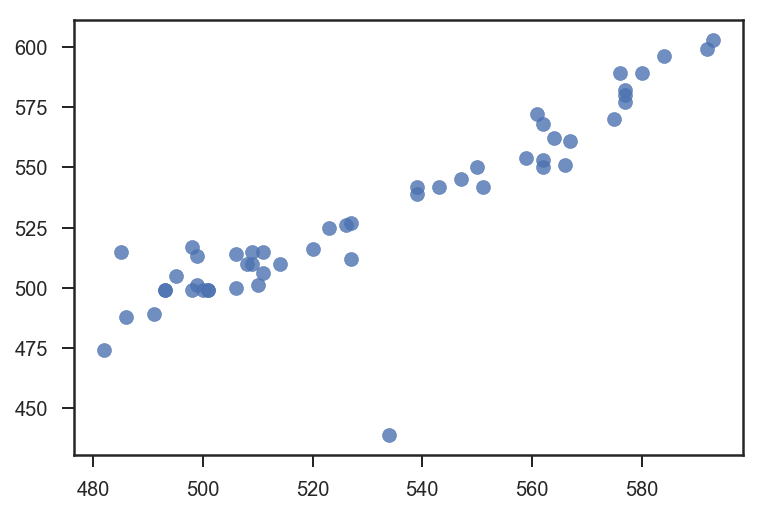

In [94]:
# Scatter plot before the correlation.

plt.scatter(x = sat_scores_spearmans['Verbal'],y=sat_scores_spearmans['Math'], alpha=0.8)

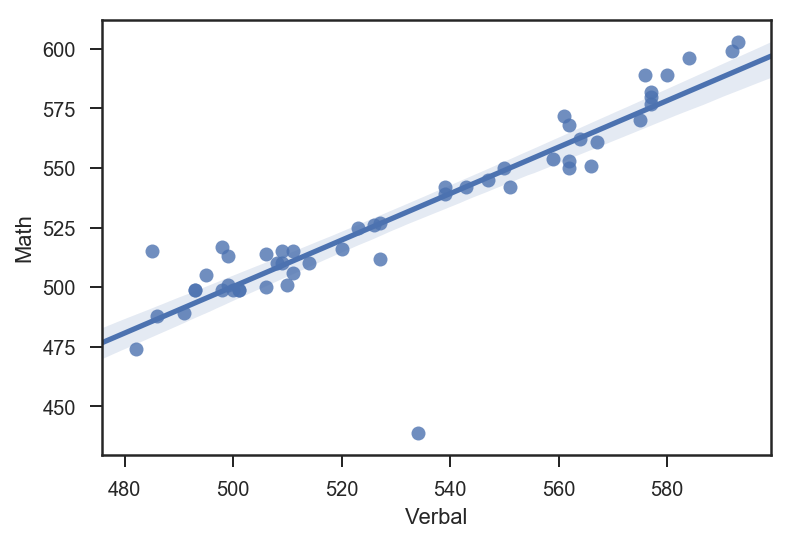

In [95]:
# Seaborne Regression Plot only intitially the Verbal and Math data set
sns.regplot(x = sat_scores_spearmans['Verbal'],y=sat_scores_spearmans['Math'])
plt.show()

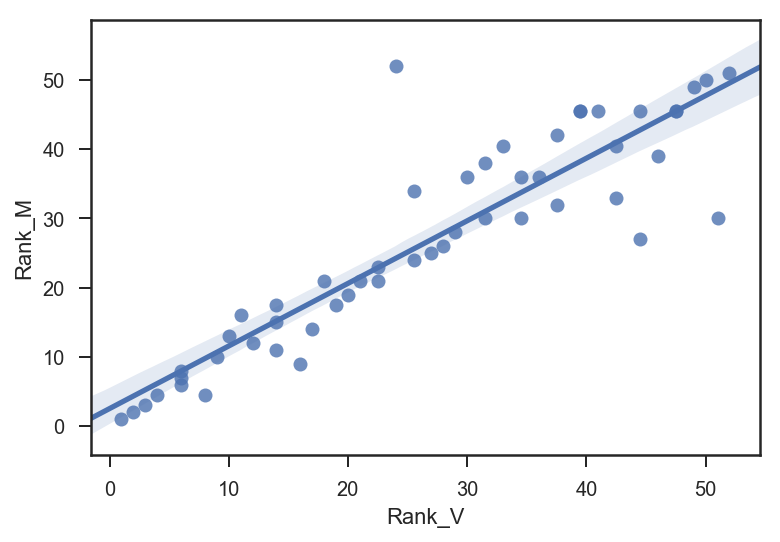

In [96]:
# Plot the Verbal and Math data set with their Spearman Ranks assigned.
import seaborn as sns
sns.regplot(x=sat_scores_spearmans['Rank_V'],y=sat_scores_spearmans['Rank_M'])
plt.show()

---
My Observation :
---
Plot is have data points dispersed due multiple similar ranks and a linear regression fit is drawn.
The slope provides information on the strength of the relationship which is not strong here as the slope isn't 1 and more evidence is found on computing Pearson coorelation where r = 0.8.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [97]:
# Printing Sat scores data frame before percentile conversion.

sat_scores_csv.head(5)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516

In [98]:
# Creating a copy to do percetile manipulations.
sat_scores_percent = sat_scores_csv.copy()

# Adding new column as Rate_percentile
sat_scores_percent.insert(2,'Rate_Percentile',0) # .insert(loc= , column= , value)

# Verify the "Rate_Percentile" is added.
sat_scores_percent.columns

Index(['State', 'Rate', 'Rate_Percentile', 'Verbal', 'Math'], dtype='object')

In [99]:
# Q 9.2.1. Converting all the values in the Rate column to percentiles and adding the results in the newly created column.
sat_scores_percent['Rate_Percentile'] = [stats.percentileofscore(sat_scores_percent['Rate'].values, i)for i in sat_scores_percent['Rate'].values]

# Verify the "Rate_Percentile" column is updated with the percentile score for every value.
sat_scores_percent

State  Rate  Rate_Percentile  Verbal  Math
0     CT    82       100.000000     509   510
1     NJ    81        98.076923     499   513
2     MA    79        96.153846     511   515
3     NY    77        94.230769     495   505
4     NH    72        92.307692     520   516
5     RI    71        89.423077     501   499
6     PA    71        89.423077     500   499
7     VT    69        85.576923     511   506
8     ME    69        85.576923     506   500
9     VA    68        82.692308     510   501
10    DE    67        80.769231     501   499
11    MD    65        77.884615     508   510
12    NC    65        77.884615     493   499
13    GA    63        75.000000     491   489
14    IN    60        73.076923     499   501
15    SC    57        71.153846     486   488
16    DC    56        69.230769     482   474
17    OR    55        67.307692     526   526
18    FL    54        65.384615     498   499
19    WA    53        62.500000     527   527
20    TX    53        62.500000     493   499
21    HI    52        59.615385     485   515
22    AK    51        56.730769     514   510
23    CA    51        56.730769     498   517
24    AZ    34        51.923077     523   525
25    NV    33        50.000000     509   515
26    CO    31        48.076923     539   542
27    OH    26        46.153846     534   439
28    MT    23        44.230769     539   539
29    WV    18        42.307692     527   512
30    ID    17        40.384615     543   542
31    TN    13        37.500000     562   553
32    NM    13        37.500000     551   542
33    IL    12        33.653846     576   589
34    KY    12        33.653846     550   550
35    WY    11        29.807692     547   545
36    MI    11        29.807692     561   572
37    MN     9        25.000000     580   589
38    KS     9        25.000000     577   580
39    AL     9        25.000000     559   554
40    NE     8        19.230769     562   568
41    OK     8        19.230769     567   561
42    MO     8        19.230769     577   577
43    LA     7        15.384615     564   562
44    WI     6        12.500000     584   596
45    AR     6        12.500000     562   550
46    UT     5         8.653846     575   570
47    IA     5         8.653846     593   603
48    SD     4         3.846154     577   582
49    ND     4         3.846154     592   599
50    MS     4         3.846154     566   551
51   All    45        53.846154     506   514

In [100]:
# Q 9.2.2. Show the percentile of California in Rate and using iloc method to access column values.

# 1. One-way
print('The Rate percentile of California state is=',sat_scores_percent.iloc[23, 2])

# 2. Another way
#print('The Rate percentile of California state is=' , float(sat_scores_percent.loc['CA'].Rate_Percentile))

The Rate percentile of California state is= 56.73076923076923


In [101]:
# Option 2 : Finding individual percentile for the column Rate.

from scipy.stats import percentileofscore
import pandas as pd

#a = sat_scores_dict_percent['Rate']
#percentiles = sat_scores_dict_percent.apply(lambda x: percentileofscore(a, x))

# 10th percentile
print('10th percentile =', sat_scores_percent.Rate.quantile(0.1)) 

# same as median
print('50th percentile =', sat_scores_percent.Rate.quantile(0.5)) 

# 90th percentile
print('90th percentile =', sat_scores_percent.Rate.quantile(0.9)) 

10th percentile = 6.0
50th percentile = 33.5
90th percentile = 71.0


In [102]:
# Option 3
from scipy.stats import percentileofscore
import pandas as pd

a = sat_scores_percent['Rate']
#print(a)
p = np.percentile(a, 10)
print('Percentile=',p)

Percentile= 6.0


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

Q 9.3.1. Why percentile scoring might be useful for dealing with outliers?

Ans : By defination we know an outlier is an observation that lies an abnormal distance from other values in a random sample from a population and percentile averages the dataset whilch helps to hide the outliers.

In [103]:
# Q 9.3.2. Plot the distribution of a variable of your choice from the drug use dataset.

# Creating the columns required for the Variable of choice = 'Alcohol_consumption' and the new col 'Percentile'
u = {'Alcohol_consumption': [], 'Percentile' : []}

# Defining a new dataframe.
drug_use_age_percentile = pd.DataFrame(data=u)

# Copying only the variable column will need for Percentile calculations. 
drug_use_age_percentile['Alcohol_consumption']=drug_use_age_new['Alcohol_consumption']

# Print and Verify
print(type(drug_use_age_percentile))
print(drug_use_age_percentile.dtypes)
drug_use_age_percentile

<class 'pandas.core.frame.DataFrame'>
Alcohol_consumption    float64
Percentile             float64
dtype: object


Alcohol_consumption  Percentile
0                   NaN         NaN
1                   NaN         NaN
2                   NaN         NaN
3                   NaN         NaN
4                   NaN         NaN
5                   NaN         NaN
6                   NaN         NaN
7                   NaN         NaN
8                   NaN         NaN
9                   NaN         NaN
10                  NaN         NaN
11                  NaN         NaN
12                  NaN         NaN
13                  NaN         NaN
14                  NaN         NaN
15                  NaN         NaN
16                  NaN         NaN

C:\Users\Home\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


ValueError: max must be larger than min in range parameter.

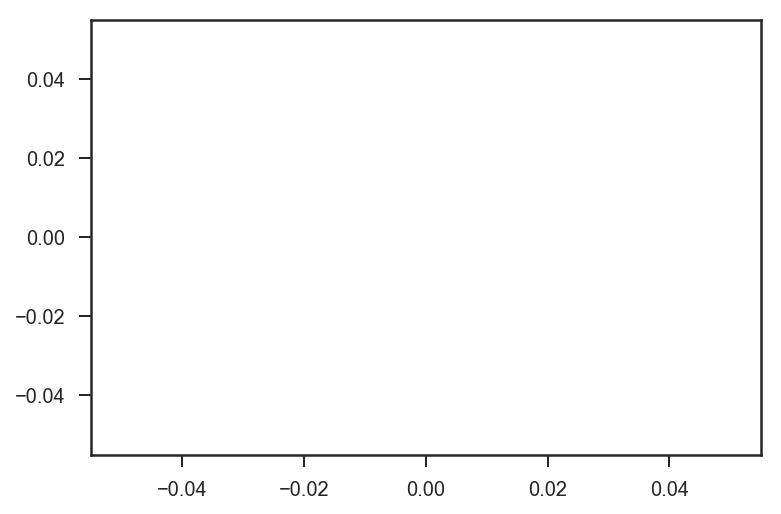

In [111]:
# Q 9.3.2. Distribution plot of Alcohol_consumption

# --- BEFORE----

sns.distplot(drug_use_age_percentile['Alcohol_consumption'],bins =10, kde=False)

# About plot : The values are higly distributed over a high range of values.

In [112]:
# Q 9.3.3. Plot the percentile of the Alcohol_consumption variable.

drug_use_age_percentile['Percentile'] = [stats.percentileofscore(drug_use_age_percentile['Alcohol_consumption'].values, i)for i in drug_use_age_percentile['Alcohol_consumption'].values]

# Verify the "Percentile" column is updated with the percentile score for every value.
drug_use_age_percentile

Alcohol_consumption  Percentile
0                   NaN         NaN
1                   NaN         NaN
2                   NaN         NaN
3                   NaN         NaN
4                   NaN         NaN
5                   NaN         NaN
6                   NaN         NaN
7                   NaN         NaN
8                   NaN         NaN
9                   NaN         NaN
10                  NaN         NaN
11                  NaN         NaN
12                  NaN         NaN
13                  NaN         NaN
14                  NaN         NaN
15                  NaN         NaN
16                  NaN         NaN

C:\Users\Home\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


ValueError: max must be larger than min in range parameter.

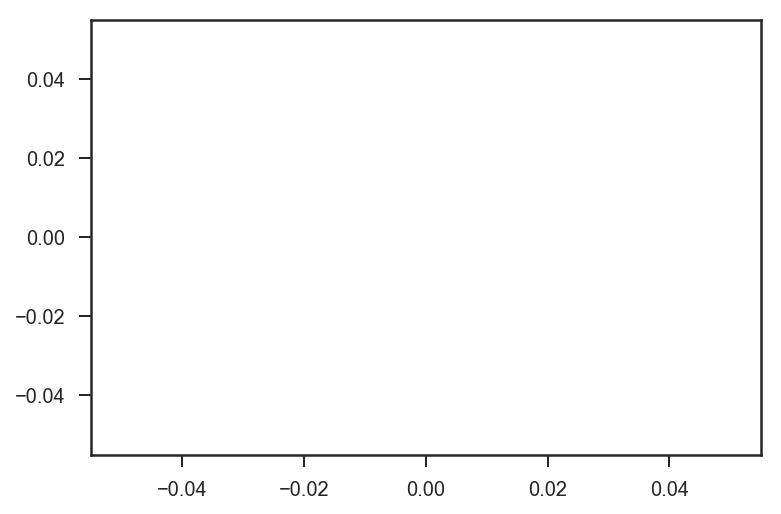

In [106]:
# Q 9.3.3 Distribution percentile plot of Alcohol_consumption

# --- AFTER----

sns.distplot(drug_use_age_percentile['Percentile'],bins =10, kde=False)

# About plot : The values are standardized over a high range of values.

---
My Observations
---
1. The scale has changed to 0 to 100 in a Percentile plot of the variable.
2. The percentile here describes that among all the people sampled what is their ranks among all values. Higher the Alcohol consumption, higher the rank and higher will be the Percentile. Hence, the plot is the standarized version for all the values.
3. Visually, the plot is looks less skewed and more uniform for higher values by coverting raw scores to percentile.


ValueError: max must be larger than min in range parameter.

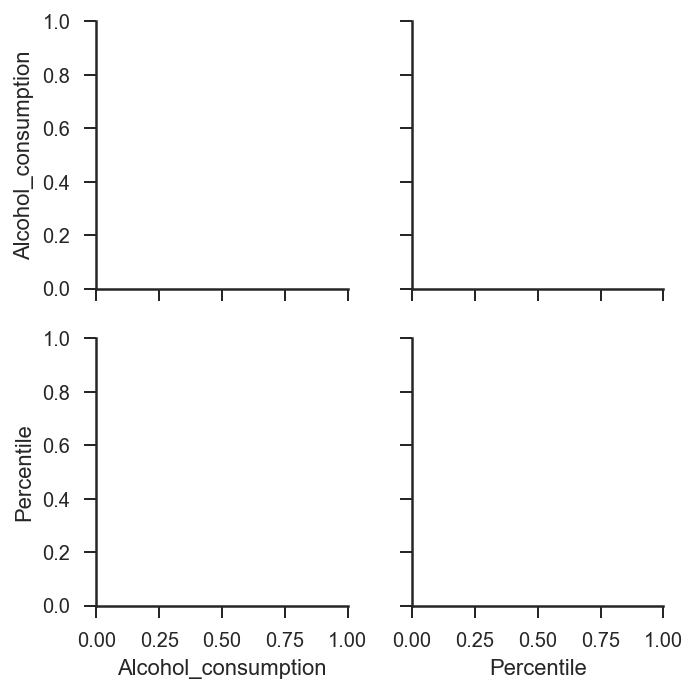

In [109]:
# Q 9.3.4. Describe the effect, visually, of coverting raw scores to percentile.

# Plotting seaborn pairplot distribution on the given dataframe to visually see the effect.

sns.set(style='ticks',color_codes=True)
sns.pairplot(drug_use_age_percentile)
